#### โครงข่ายประสาทเทียมและการเรียนรู้เชิงลึก (Artificial Neural Networks and Deep Learning)
**ดร.วโรดม ตู้จินดา**
<br>ภาควิชาวิศวกรรมเครื่องกล มหาวิทยาลัยเกษตรศาสตร์

***
## บทที่ 2. พื้นฐานของโครงข่ายประสาทเทียมเชิงลึก

เนื้่อหาในบทนี้เป็นการศึกษาหลักการทางคณิตศาสตร์ของการเรียนรู้เชิงลึก
เริ่มตั้งแต่การพยากรณ์เอาต์พุตที่เป็นสเกลาร์โดยโมเดลอย่างง่ายที่มีเพียงเซลล์ประสาทเดียว 
แนวทางของการเรียนรู้โดยมีผู้สอนคือการปรับค่าของพารามิเตอร์โมเดลเพื่อทำให้เอาต์พุตจากการพยากรณ์มีค่าเข้าสู่ค่าจริง 

ต่อมาจะกล่าวถึงปัญหาหนึ่งที่ได้รับความสนใจอย่างมากในการเรียนรู้เชิงลึก หรือในสาขาการเรียนรู้ของเครื่องโดยทั่วไปคือ 
การจำแนกประเภท (classification) ซึ่งเริ่มจากปัญหาขั้นพื้นฐานที่สุดคือการจำแนกทวิภาค (binary) 
เช่นการตรวจสอบว่ามีมนุษย์อยู่ในภาพหรือไม่ การจำแนกระหว่างสัตว์สองชนิด จนถึงการจำแนกหลายประเภท 
(multiclass) เช่นการตัดสินภาพของผลไม้ว่าเป็นองุ่น สัปปะรด กล้วยหอม หรือลูกไหน 

เมื่อพิจารณาปัญหาที่มนุษย์ประสบในชีวิตประจำวันจะพบว่ามีจำนวนไม่น้อยที่ต้องการการตัดสินใจ โดยเฉพาะปัญหาเชิงทวิภาค 
เช่นการเลือกอีเมล์ที่มีเนื้อหาสำคัญออกจากขยะ สภาพอากาศวันนี้เหมาะสมกับการตากผ้าหรือไม่ 
สภาพของเครื่องจักรกลในสายงานผลิตต้องการการบำรุงรักษาแล้วหรือยัง 
มีขั้นตอนวิธีด้านการเรียนรู้ของเครื่องที่สามารถช่วยแก้ปัญหาดังกล่าวได้อย่างเหมาะสม เช่นการแบ่งกลุ่ม (clustering)
ต้นไม้การตัดสินใจ (decision tree) หรือ ซัพพอร์ตเวกเตอร์แมชชีน (support vector machine) ที่นิยมเรียกโดยย่อว่า SVM 
อย่างไรก็ตามวิธีการเหล่านี้มักจะด้อยประสิทธิภาพลงเมื่อข้อมูลมีจำนวนมาก ซึ่งเป็นเหตุผลสำคัญประการหนึ่งที่ทำให้โครงข่ายประสาทเทียม
ได้รับความสนใจมากขึ้นในปัจจุบัน

นำเข้าไลบรารีของไพธอนทั้งหมดที่ใช้งานในบทนี้ 

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
import sklearn.datasets
import sklearn.linear_model

### 2.1 การถดถอยเชิงเส้น

อาจกล่าวได้ว่าการถดถอยเชิงเส้น (linear regression) คือปัญหาขั้นพื้นฐานที่สุดสำหรับการเรียนรู้เชิงลึก 
เป็นแนวทางเชิงเส้นในการโมเดลความสัมพันธ์ระหว่างผลตอบสนองสเกลาร์ (เอาต์พุต) กับตัวแปรอิสระที่อาจมีมากกว่าหนึ่งตัว 
ในกรณีที่เอาต์พุตมีมากกว่าหนึ่งจะเรียกว่า การถดถอยเชิงเส้นหลายตัวแปร (multivariable linear regression) 
ซึ่งจะไม่กล่าวถึงในหัวข้อนี้

ปัญหาการถดถอยเชิงเส้นพื้นฐานที่ประกอบด้วยอินพุตสเกลาร์ $x$ เอาต์พุตสเกลาร์ $y$ สามารถโมเดลได้โดยสมการสัมพรรค 
$y = wx+b$ โดยค่าสเกลาร์ $w, b$ คือพารามิเตอร์ของโมเดล การหาค่าที่เหมาะที่สุดของ $w, b$ อาจทำได้โดยวิธีการทางสถิติ 
หรือวิธีกำลังสองน้อยสุด แต่สำหรับการศึกษาในบทนี้ต้องการต่อยอดไปยังการเรียนรู้เชิงลึก ดังนั้นจะใช้การฝึกโมเดลจากชุดข้อมูล

เราสามารถใช้ขั้นตอนวิธีการถดถอยเชิงเส้นในการพยากรณ์ปัญหาพื้นฐานในชีวิตจริง เช่นราคาบ้าน การแพร่ระบาดของโรคติดต่อ 
แต่เพื่อความเข้าใจหลักการและสามารถต่อยอดไปยังโครงข่ายที่ซับซ้อนขึ้น จะยกตัวอย่างปัญหาจากข้อมูลสังเคราะห์ 

##### ตัวอย่าง 2.1

สมมุติว่ามีระบบเชิงเส้นที่มีค่าพารามิเตอร์ดังนี้

$$
y = 2x - 3
$$

กำเนิดข้อมูล $(x,y)$ จำนวน 10 ตัวอย่างสำหรับใช้ในการฝึก 


In [7]:
xs = np.arange(1, 11, dtype=float)
ys = 2*xs - 3
print("xs = ", xs)
print("ys = ", ys)

xs =  [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
ys =  [-1.  1.  3.  5.  7.  9. 11. 13. 15. 17.]


สร้างโครงข่ายประสาทเทียมอย่างง่ายสุดที่มีเพียงชั้นเดียวและเซลล์ประสาทเดียว และรูปร่างของอินพุตมีเพียง 1 ค่า

In [8]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])

ในการคอมไพล์โมเดล จะต้องกำหนดฟังก์ชันการสูญเสีย (loss function) และตัวหาค่าเหมาะที่สุด (optimizer) 
ที่ต้องการใช้ สำหรับปัญหาการถดถอยเชิงเส้น เหมาะสมที่จะใช้ฟังก์ชันการสูญเสียแบบ ค่าผิดพลาดกำลังสองเฉลี่ย 
(mean squared error) และตัวหาค่าเหมาะที่สุดแบบลดค่าเกรเดียนต์สโทแคสติก (stochastic gradient descent) 
ซึ่งจะได้อธิบายเพิ่มเติมภายหลัง ในขั้นนี้เราเพียงใส่อาร์กิวเมนต์ตามรูปแบบที่ไลบรารีกำหนด

In [9]:
model.compile(optimizer='sgd', loss='mean_squared_error')

หลังจากคอมไพล์แล้ว ขั้นตอนต่อไปคือการฝึกโมเดลโดยเรียก model.fit() ใส่อาร์กิวเมนต์เป็นแอเรย์อินพุต เอาต์พุต 
จำนวนรอบที่ต้องการฝึก เราจะลองแสดงเอาต์พุดจากการฝึก 10 รอบ

In [10]:
model.fit(xs, ys, epochs=10)

Epoch 1/10
1/1 [==============================] - 0s 168ms/step - loss: 199.8131
Epoch 2/10
1/1 [==============================] - 0s 2ms/step - loss: 11.4000
Epoch 3/10
1/1 [==============================] - 0s 2ms/step - loss: 2.7367
Epoch 4/10
1/1 [==============================] - 0s 1ms/step - loss: 2.3206
Epoch 5/10
1/1 [==============================] - 0s 1ms/step - loss: 2.2831
Epoch 6/10
1/1 [==============================] - 0s 1ms/step - loss: 2.2632
Epoch 7/10
1/1 [==============================] - 0s 1ms/step - loss: 2.2442
Epoch 8/10
1/1 [==============================] - 0s 1ms/step - loss: 2.2254
Epoch 9/10
1/1 [==============================] - 0s 1ms/step - loss: 2.2067
Epoch 10/10
1/1 [==============================] - 0s 1ms/step - loss: 2.1882


จากเอาต์พุตจะเห็นว่าค่าการสูญเสียลดลง หมายความว่าตัวหาค่าเหมาะที่สุดทำงานอย่างถูกต้องเพื่อทำให้การพยากรณ์มีค่าเข้าใกล้ค่าจริงมากขึ้น 
กล่าวคือโมเดลกำลังเรียนรู้จากชุดข้อมูลที่ใช้ในการฝึก

ต้องการฝึกโมเดลต่ออีก 1000 รอบ หากไม่ต้องการดูเอาต์พุตสามารถกำหนด verbose = 0 

In [11]:
model.fit(xs, ys, epochs=1000,verbose=0)

เมื่อฝึกจำนวนรอบตามต้องการแล้ว หากต้องการพยากรณ์เอาต์พุตสำหรับค่าอินพุตค่าหนึ่ง ใช่คำสั่ง model.predict() 
ตัวอย่างเช่นพยากรณ์ค่า $y$ สำหรับ $x = 20$

In [12]:
y_hat = model.predict([20.0])
print("ค่า y จากการพยากรณ์ = ",y_hat)

ค่า y จากการพยากรณ์ =  [[36.911385]]


เปรียบเทียบกับค่าจริงจาก $y = 2x - 3$ 

In [13]:
y_true = 2*20.0 - 3
print("ค่า y จากสมการจริง = ",y_true)

ค่า y จากสมการจริง =  37.0


จะเห็นว่าค่าที่พยากรณ์มีค่าใกล้เคียงกับค่าจริง แต่ไม่เท่ากันโดยสมบูรณ์ หากต้องการแสดงค่าพารามิเตอร์ของโมเดลหลังจากการฝึกใช้คำสั่ง

In [14]:
model.get_weights()

[array([[1.9932034]], dtype=float32), array([-2.9526837], dtype=float32)]

ซึ่งมีความแตกต่างเล็กน้อยจากพารามิเตอร์จริงคือ $w = 2, b = -3$

### 2.2 การถดถอยลอจิสติก

พื้นฐานสำคัญทางคณิตศาสตร์ที่ช่วยทำให้เข้าใจการจำแนกประเภททวิภาคโดยโครงข่ายประสาทเทียมได้ดีขึ้นคือ การถดถอยลอจิสติก 
(logistic regression) ซึ่งแตกต่างจากการถดถอยเชิงเส้นในหัวข้อก่อนหน้านี้ 
ที่เป็นการพยากรณ์ค่าของตัวแปรเลขจำนวนจริง การถดถอยลอจิสติกเป็นการพยากรณ์ความน่าจะเป็นของ
ผลลัพธ์ในช่วง [0,1] ซึ่งสอดคล้องกับปัญหาการจำแนกทวิภาค 

ก่อนจะเริ่มต้นศึกษาการถดถอยลอจิสติก จำเป็นต้องกล่าวถึงสัญกรณ์ที่ใช้ในการกำหนดขนาดของอินพุตและเอาต์พุต 
พิจารณาตัวอย่างปัญหาการจำแนกทวิภาคของข้อมูลภาพดังแสดงในรูปที่ 2.1 โจทย์คือต้องการตรวจสอบภาพอินพุตหนึ่งและให้เอาต์พุตเป็น 
0 หากไม่มีแมวในภาพ หรือเป็น 1 หากตรวจพบแมว 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1Jk4KeX6OeIuzvGO9i_Nj0940KBtidAin" width=600 />
</p>
<div align="center">รูปที่ 2.1 การจัดรูปแบบข้อมูลภาพในการจำแนกทวิภาค</div>

สมมุติว่าภาพมีขนาดความกว้างและความยาวเท่ากับ 64 พิกเซล และเป็นภาพสีที่แทนด้วย RGB (แดง เขียว น้ำเงิน) 
ดังนั้นจำนวนจุดข้อมูลทั้งหมดของอินพุตคือ 64 x 64 x 3 = 12,288 จุด ในการประมวลผลโดยโครงข่ายประสาทเทียม 
จะจัดเรียงจุดข้อมูลเหล่านี้เป็นเวกเตอร์อินพุต เริ่มจากจุดสมาชิกของสีแดง ต่อด้วยสีเขียว และสีน้ำเงิน ดังในรูปที่ 2.1 

ในการกำหนดสัญกรณ์ที่ใช้ในหนังสือนี้ สำหรับข้อมูลตัวอย่างหนึ่งภาพ $(x,y)$ ประกอบด้วยภาพอินพุต $X \in \mathbf{R}^{n_x}$ 
และเลเบล $Y \in \{0,1\}$ สำหรับกรณีภาพไม่มีหรือมีแมว กำหนดจำนวนข้อมูลที่ใช้ในการฝึก $m$ ตัวอย่างเขียนได้ในรูป 
$(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots,(x^{(m)},y^{(m)})$ 
โดยสังเกตว่าจะใช้เลขยกกำลังในวงเล็บแทนดัชนีของตัวอย่าง 

ในการฝึกข้อมูลจำนวน $m$ ตัวอย่าง นิยามเมทริกซ์อินพุต $X \in \mathbf{R}^{n_x \times m}$

$$
X = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
X^{(1)} & X^{(2)} & \ldots & X^{(m)} \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \tag{2.1}
$$

และเวกเตอร์เอาต์พุต $Y \in \mathbf{R}^{1 \times m}$

$$
Y = \begin{bmatrix} 
y^{(1)} & y^{(2)} & \ldots & y^{(m)} 
\end{bmatrix} \tag{2.2}
$$

ดังนั้นสำหรับสัญกรณ์ที่กำหนดนี้ สามารถสรุปปัญหาการถดถอยลอจิสติกได้คือ สำหรับข้อมูลอินพุต $X \in \mathbf{R}^{n_x}$ ตัวอย่างหนึ่ง เช่นรูปภาพที่ต้องการตัดสินว่ามีแมวอยู่หรือไม่ 
ต้องการให้ขั้นตอนวิธีพยากรณ์ผลลัพธ์ $\hat{y} = P(y=1|x)$ คือความน่าจะเป็นที่ภาพนี้จะเป็นภาพแมว 

ในการคำนวณเอาต์พุตจากพารามิเตอร์ของขั้นตอนวิธีคือ $w \in \mathbf{R}^{n_x}$ และ $b \in \mathbf{R}$ ต้องการประมาณค่า $\hat{y}$ 
พบว่าแนวทางอย่างง่ายคือใช้ฟังก์ชันสัมพรรค $\hat{y} = w^Tx + b$ ไม่เหมาะสมเนื่องจากไม่สามารถจำกัดเอาต์พุตให้อยู่ในช่วง 0 - 1 ได้ 
วิธีแก้คือส่งเอาต์พุตผ่านฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น 

$$
\hat{y} = \sigma(w^Tx + b) \tag{2.3}
$$

โดยฟังก์ชันซิกมอยด์ $\sigma()$ มีนิยามดังนี้

$$
\sigma(z) = \frac{1}{1+e^{-z}} \tag{2.4}
$$

สามารถพล็อตกราฟของ $\sigma()$ โดยโค้ดไพธอนได้ดังรูปที่ 2.2 

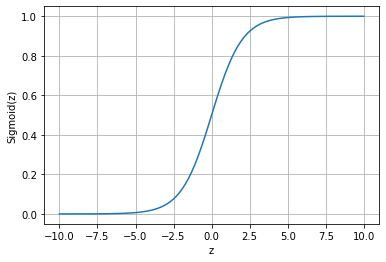

In [15]:
z = np.linspace(-10, 10, 100)
y = 1/(1 + np.exp(-z))
  
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("Sigmoid(z)")
plt.grid() 
plt.show()

รูปที่ 2.2 กราฟของฟังก์ชันซิกมอยด์

ทดลองเปลี่ยนย่านของตัวแปร $z$ ให้กว้างขึ้น จะพบว่าเมื่อ $z$ มีค่ามาก $\sigma(z)$ จะลู่เข้าสู่ค่า 1 ส่วนเมื่อ $z$ มีค่ามากทางด้านลบ 
$\sigma(z)$ จะลู่เข้าสู่ค่า 0 ดังนั้นการประมาณค่าความน่าจะเป็นโดย (2.3) จึงมีค่าอยู่ในช่วง $[0,1]$ ตามต้องการ

#### 2.2.1 ฟังก์ชันมูลค่า

สรุปโจทย์ปัญหาของการถดถอยลอจิสติกได้ว่า เมื่อกำหนดข้อมูล $(x^{(1)},y^{(1)}),(x^{(2)},y^{(2)}),\ldots,(x^{(m)},y^{(m)})$ 
ต้องการพยากรณ์ $\hat{y}^{(i)} \approx y^{i}$ โดย $\hat{y}^{(i)} = \sigma(w^Tx^{(i)} + b)$ 
และ $\sigma(z^{(i)}) = \frac{1}{1+e^{-z^{(i)}}}$

ก่อนที่จะฝึกขั้นตอนวิธี จะต้องนิยามฟังก์ชันมูลค่า (cost function) โดยเริ่มจากหาฟังก์ชันที่คำนวณค่าผิดพลาด เรียกว่าฟังก์ชันการสูญเสีย 
(loss function) ซึ่งเป็นตัวชี้วัดว่าการพยากรณ์ใกล้เคียงมากน้อยเพียงใด ตัวอย่างหนึ่งของฟังก์ชันการสูญเสียที่ใช้ในการพยากรณ์รูปแบบอื่นคือค่าผิดพลาดกำลังสอง 
$\mathcal{L}(\hat{y},y)=\frac{1}{2}(\hat{y}-y)^2$ แต่จะพบว่าไม่เหมาะสมสำหรับปัญหาการถดถอยลอจิสติกเพราะทำให้การหาค่าเหมาะที่สุดไม่เป็นแบบคอนเวกซ์
ผลคือไม่สามารถหาค่าต่ำสุดครอบคลุม (global minimum) ของฟังก์ชันได้ 

ดังนั้นสำหรับปัญหาการถดถอยลอจิสติกจะใช้ฟังก์ชันการสูญเสียที่ทำให้การหาค่าเหมาะุที่สุดเป็นแบบคอนเวกซ์ นิยามได้เป็นดังนี้

$$
\mathcal{L}(\hat{y},y)= -(y\; log \hat{y}+(1-y)log (1-\hat{y})) \tag{2.5}
$$

เมื่อลองวิเคราะห์แบบง่ายจะเข้าใจว่าทำไมฟังก์ชันนี้ถึงมีความเหมาะสม ในกรณี $y = 1$ ฟังก์ชันการสูญเสียจะลดเหลือ 
$\mathcal{L}(\hat{y},y)= -log \hat{y}$ หากต้องการลดค่าการสูญเสียเหลือน้อยสุด $log \hat{y}$ จะต้องมีค่ามาก 
กล่าวคือ $\hat{y}$ มีค่ามาก แต่ค่าสูงสุดของฟังก์ชันซิกมอยด์คือ 1 ดังนั้น $\hat{y} \rightarrow 1$ ส่วนในกรณี $y = 0$ 
จะได้ว่า $\mathcal{L}(\hat{y},y)= -log (1- \hat{y})$ ค่าการสูญเสียจะน้อยเมือ $log (1 - \hat{y})$ มีค่ามาก คือ 
$\hat{y}$ มีค่าน้อย ซึ่งจากค่าน้อยสุดของฟังก์ชันซิกมอยด์ $\hat{y} \rightarrow 0$

สังเกตว่าฟังก์ชันการสูญเสียนี้ถูกนิยามสำหรับข้อมูลการฝึกเพียงตัวอย่างเดียว เราต้องการนิยามฟังก์ชันมูลค่าสำหรับเซตข้อมูลการฝึกทั้งหมด

$$
J(w,b) = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)}) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)} log \hat{y}^{(i)}+(1-y^{(i)})log (1-\hat{y}^{(i)})] \tag{2.6}
$$

ในส่วนท้ายของหัวข้อย่อยนี้จะอธิบายเพิ่มเติมสำหรับผู้อ่านที่สนใจที่มาของฟังก์ชันการสูญเสียและฟังก์ชันมูลค่าสำหรับปัญหาการถดถอยลอจิสติก ในการพยากรณ์เอาต์พุต 
$\hat{y} = \sigma(w^Tx+b)$ ตีความได้ว่า $\hat{y} = p(y=1|x)$ คือความน่าจะเป็นที่จะได้ค่าเอาต์พุตเป็น 1 สำหรับอินพุตที่กำหนด 
หรืออาจกล่าวได้ว่าสำหรับค่า $y \in \{0, 1\}$

$$
y = 1 \rightarrow p(y|x) = \hat{y} 
$$

$$
y = 0 \rightarrow p(y|x) = 1 - \hat{y}
$$

ต้องการรวมสองเงื่อนไขนี้ให้อยู่ในสมการเดียวกัน จะเขียนได้เป็นดังนี้

$$
p(y|x) = \hat{y}^y(1-\hat{y})^{(1-y)}
$$

ตรวจสอบได้โดยการแทนค่า $y \in \{0, 1\}$ ในขั้นตอนต่อมาพิจารณาฟังก์ชัน log() ที่เป็นแบบฟังก์ชันทางเดียว (monotonic) และมีคุณสมบัติ

$$
log \; p(y|x) = log \; (\hat{y}^y(1-\hat{y})^{(1-y)}) = y\; log \hat{y}+(1-y)log (1-\hat{y})
$$

ซึ่งสอดคล้องกับพจน์ทางด้านขวาของฟังก์ชันการสูญเสีย (2.5) การที่ใช้เป็นค่าลบเนื่องจากในการฝึกต้องการให้ฟังก์ชันมีค่าน้อยสุด 
เป็นผลทำให้ค่าลอการิทึมของความน่าจะเป็นมีค่ามากสุด 

จากฟังก์ชันการสูญเสียของหนึ่งตัวอย่างสามารถขยายไปสู่ฟังก์ชันมูลค่าของตัวอย่างทั้งหมด พิจารณาความน่าจะเป็นของเลเบลทั้งหมดในการฝึก 
เขียนแทนโดย $p(Y|X)$ ที่ต้องการทำให้มีค่ามากสุด

$$
p(Y|X) = \prod_{i=1}^m\; p(y^{(i)}|x^{(i)})
$$

ใส่ฟังก์ชันลอการิทึมทั้งสองด้านไม่ทำให้การหาค่าเหมาะที่สุดเปลี่ยน เพราะ log() เป็นฟังก์ชันทางเดียว

$$
log \;p(Y|X) = log \; \prod_{i=1}^m\; p(y^{(i)}|x^{(i)}) = \sum_{i=1}^m\; log \; p(y^{(i)}|x^{(i)}) = -\sum_{i=1}^m \mathcal{L}(\hat{y}^{(i)}, y^{(i)})
$$

โดยใช้คุณสมบัติลอการิทึมของผลคูณเท่ากับผลบวกของลอการิทึม ดังนั้นจึงเป็นที่มาของฟังก์ชันมูลค่า (2.6) 
โดยละทิ้งเครื่องหมายลบเนื่องจากการต้องการลดค่า $J(w,b)$ เพื่อเพิ่มค่าความน่าจะเป็น $p(Y|X)$ สำหรับการเพิ่มพจน์ $1/m$ 
ก็เพื่อความเหมาะสมในการปรับมาตราส่วนเท่นั้น โดยไม่มีผลกับขั้นตอนวิธีการหาค่าเหมาะที่สุด

#### 2.2.2 ขั้นตอนวิธีลดค่าเกรเดียนต์

หลังจากที่ได้นิยามฟังก์ชันมูลค่าแล้ว การฝึกโครงข่ายประสาทเทียมเพื่อเรียนรู้การจำแนกกระทำได้โดยใช้ขั้นตอนวิธีหาค่าเหมาะที่สุดเพื่อลดค่าของฟังก์ชันมูลค่า (2.6) 
กล่าวคือ ต้องการหาค่า $w,b$ เพื่อลดค่า $J(w,b)$ ให้เหลือน้อยที่สุด ขั้นตอนวิธีรูปแบบหนึ่งที่เป็นพื้นฐา่นและเข้าใจได้ง่ายเรียกว่า การลดค่าเกรเดียนต์ (gradient descent) 

ในความเป็นจริง มิติของ $J(w,b)$ ขึ้นกับข้อมูล แต่เพื่อให้มองเห็นภาพจะแสดงโดยฟังก์ชันคอนเว็กซ์ใน 3 มิติดังเช่นในรูปที่ 2.2 
ก่อนเริ่มต้นการฝึก $J(w,b)$ ถูกตั้งค่าเป็นจุดใดๆ บนพื้นที่ผิวของกราฟ 
(แสดงโดยตัวอักษร A ในรูปที่ 2.2) ในแต่ละขั้น ค่าเกรเดียนต์หรือความชันจะถูกคำนวณและขั้นตอนวิธีจะปรับตำแหน่งของ $J(w,b)$ 
ในทิศทางตรงกันข้ามกับค่าความชันสูงสุด เปรียบได้กับการไต่ลงจากหน้าผาในทิศทางที่ชันที่สุดนั่นเอง ดังนั้นหากฟังก์ชันเป็นแบบคอนเวกซ์ 
ค่าของ $J(w,b)$ จะเคลื่อนที่ลงจนในที่สุดเข้าสู่จุด O ซึ่งเป็นค่าต่ำสุดครอบคลุม

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1A8wHCD7JVaZQias8Rf-UKvr18--EMvSe" width=600 />
</p>
<div align="center">รูปที่ 2.2 การทำงานของขั้นตอนวิธีลดค่าเกรเดียนต์</div>

ในการอธิบายการทำงานของการลดค่าเกรเดียนต์ให้เข้าใจได้ง่ายขึ้น จะลดมิติของฟังก์ชันมูลค่าลงเหลือ 2 มิติโดยพิจารณาเพียงพารามิเตอร์ 
$w$ เท่านั้นดังแสดงในรูปที่ 2.3 ขั้นตอนวิธีสำหรับปรับค่าพารามิเตอร์จะอยู่ในรูป

*Repeat :*
$$
w := w - \alpha \; dw \tag{2.7}
$$

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1uCRs0tac9Wm5q_I3G0BILp1y47AherL2" width=600 />
</p>
<div align="center">รูปที่ 2.3 ขั้นตอนวิธีลดค่าเกรเดียนต์ใน 2 มิติ</div>

โดยลักษณะคำสั่งนี้เขียน $dw$ แทน $\frac{dJ(w)}{dw}$ เพื่อความง่าย เครื่องหมาย := 
คือการแทนค่าด้านซ้ายด้วยผลการคำนวณทางด้านขวา คำสั่งนี้จะถูกวนรอบจนกว่าค่าแตกต่างจากจุดต่ำสุดอยู่ในเกณฑ์ที่พอใจ 
ตัวแปร $\alpha$ แทนอัตราการเรียนรู้ซึ่งเป็นตัวควบคุมขนาดของขั้นในการปรับค่าแต่ละครั้งของการวนรอบ

**หมายเหตุ :** ในการตั้งชื่อตัวแปรสำหรับการแพร่กระจายย้อนหลัง (back propagation) 
สมมุติว่าตัวแปร $u,\; v$ คือเอาต์พุตที่เกิดขึ้นในระหว่างชั้นของโครงข่ายประสาทเทียมและ $J$ 
คือเอาต์พุตขั้นสุดท้าย เราจะใช้ชื่อ <code>du, dv</code>
แทน $\frac{dJ}{du},\; \frac{dJ}{dv}$ 
เนื่องจากส่วน $dJ$ จะอยู่ในทุกพจน์ที่ใช้กฎลูกโซ่ของแคลคูลัสในการคำนวณ
การตั้งชื่อยาวเช่น <code>dJdu, dJdv</code> ทำให้โค้ดอ่านยากขึ้น
    

พิจารณากรณีจุดเริ่มต้น L อยู่ทางซ้ายของจุดต่ำสุด O เมื่อคำนวณอนุพันธ์ (ความชัน) ที่จุด L จะได้ว่า $dw_L <0$ ดังนั้นจาก 
(2.6) ค่าของ $w$ จะถูกปรับให้มีค่าเพิ่มขึ้น คือเคลื่อนที่ในทิศทางด้านขวาตามลูกศรเข้าสู่จุด O สำหรับกรณีจุดเริ่มต้น R ที่อยู่ทางขวาของ O 
จะได้ $dw_R > 0$ ดังนั้น $w$ จะเคลื่อนที่ในทิศทางด้านซ้ายตามลูกศรเข้าสู่จุด O สรุปได้ว่าเมื่อ $J(w)$ เป็นฟังก์ชันคอนเวกซ์ 
ขั้นตอนวิธีลดค่าเกรเดียนต์จะทำให้ฟังก์ชันมูลค่าเข้าสู่จุดต่ำสุดครอบคลุมได้เสมอ 
เว้นแต่ว่าค่าของอัตราการเรียนรู้สูงเกินไปอาจทำให้ขั้นตอนวิธีไม่เสถียร

เราสามารถใช้คำอธิบายข้างต้นกับพารามิเตอร์ $b$ โดยขั้นตอนวิธี

*Repeat :* 
$$
b := b - \alpha \; db \tag{2.8}
$$

และขยายไปถึงกรณีหลายมิติทั่วไปที่ไม่สามารถแสดงรูปภาพได้ 
และสำหรับผู้ที่เคร่งในสัญกรณ์ทางคณิตศาสตร์ อนุพันธ์จะต้องถูกแทนด้วยอนุพันธ์ย่อย $\frac{\partial J(w,b)}{\partial w}$ 
และ $\frac{\partial J(w,b)}{\partial b}$ แต่ในการเขียนโค้ดเราจะยังคงแทนด้วย $dw$ และ $db$ ตามลำดับ 
ดังเช่นในขั้นตอนวิธี (2.6), (2.7)



#### 2.2.3 การลดค่าเกรเดียนต์สำหรับการถดถอยลอจิสติก

ในหัวข้อย่อยนี้เป็นการศึกษาแนวทางการใช้ขั้นตอนวิธีลดค่าเกรเดียนต์สำหรับปัญหาการถดถอย โดยเริ่มต้นจากการเขียนโค้ดจากสมการคณิตศาสตร์โดยตรง 
ในการพัฒนาโครงข่ายประสาทเทียมขั้นพื้นฐานจะใช้เครื่องมือที่เรียกว่าแผนภาพเชิงคำนวณ (computational graph) 
ซึ่งมีข้อดีคือช่วยทำให้เข้าใจการไหลทั้งด้านเดินหน้าและย้อนหลังได้ง่าย (ถึงแม้ว่า TF เวอร์ชัน 2.x จะไม่ได้ใช้เป็นเครื่องมือหลักแล้วก็ตาม) 
เพื่อให้เข้าใจถึงคณิตศาสตร์ภายในของโครงข่ายประสาทเทียมและการเรียนรู้เชิงลึกดีขึ้น เราจะลองเขียนโค้ดโดยใช้แผนภาพเชิงคำนวณ

ต้องการให้สัญกรณ์สอดคล้องกับชื่อตัวแปรในโปรแกรม โดยหลีกเลี่ยงสัญลักษณ์พิเศษเช่น $\hat{y}$ เราจะกำหนดโดยใช้อักขระดังนี้
$$
z = w^Tx + b \tag{2.9}
$$
$$
\hat{y} = a = \sigma(z) \tag{2.10}
$$
$$
\mathcal{L}(a,y) = -(y\;log(a) + (1-y)log(1-a)) \tag{2.11}
$$

ในการอธิบายจะใช้ ANN สองอินพุต ซึ่งเมื่อเข้าใจแล้วสามารถขยายไปยัง ANN ทั่วไปที่มีจำนวนอินพุตเท่ากับ
$n_x$ รูปที่ 2.4 แสดงแผนภาพเชิงคำนวณสำหรับ 1 ข้อมูลตัวอย่างที่จะใช้ในการเขียนโปรแกรม ประกอบด้วยการคำนวณในทิศทางข้างหน้า (2.9) - (2.11)
เพื่อหาค่าฟังก์ชันการสูญเสียจากอินพุตและพารามิเตอร์ของ ANN และการแพร่กระจายย้อนหลังเพื่อปรับค่าของพารามิเตอร์ 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1-Lvnj4KyFFT0o6Y4TnB57hf_N0gRVkfG" width=600 />
</p>
<div align="center">รูปที่ 2.4 แผนภาพเชิงคำนวณของโครงข่ายประสาทเทียม 2 อินพุต</div>

**หมายเหตุ :** การแสดงรายละเอียดของการแพร่กระจายย้อนกลับนี้จะค่อนข้างซับซ้อน ในทางปฏิบัติจะถูกจัดการโดยไลบรารีเช่น TF 

ในการคำนวณการแพร่กระจายย้อนหลังจะใช้หลักการของแคลคูลัสร่วมกับกฎลูกโซ่ 
เริ่มจากการหาอนุพันธ์ของฟังก์ชันการสูญเสีย (2.5) ทิ้งให้เป็นแบบฝึกหัดในการแสดงว่า

$$
\frac{d\mathcal{L}(a,y)}{da} = -\frac{y}{a} + \frac{1-y}{1-a} \tag{2.12}
$$

ในโค้ดจะเรียกตัวแปรนี้ว่า ```da``` ต่อมาแพร่กระจายค่านี้ย้อนหลังจะได้ว่า

$$
d\frac{d\mathcal{L}(a,y)}{dz} = \frac{\mathcal{L}(a,y)}{da}\frac{da}{dz} = a-y \tag{2.13}
$$

โดยสามารถตรวจสอบได้โดยใช้ (2.12) ร่วมกับ $\frac{da}{dz} = a(1-a)$ ตั้งชื่อตัวแปร <code>dz</code>สำหรับ (2.13) 
สุดท้ายคือการแพร่กระจายย้อนกลับไปยัง 
$\frac{\partial \mathcal{L}(a,y)}{\partial w_1}, \; \frac{\partial\mathcal{L}(a,y)}{\partial w_2}, \; \frac{\partial \mathcal{L}(a,y)}{\partial b}$
 ตั้งชื่อตัวแปรว่า <code>dw1, dw2, db</code> ตามลำดับ ได้ความสัมพันธ์ดังนี้
```python
dw1 = x1dz
dw2 = x2dz
db = dz
```
โดย <code>dz</code> คำนวณได้จาก (2.13) หลังจากนั้นอัพเดทค่าของตัวแปร
```python
w1 := w1 - αdw1
w2 := w2 - αdw2
b := b - αdb
```
โดย α คือค่าอัตราการเรียนรู้ สังเกตว่าโค้ดตรงส่วนนี้เหมาะสมที่จะใช้การวนรอบในกรณีที่พารามิเตอร์มีจำนวนมากขึ้น

เมื่อได้โค้ดสำหรับข้อมูล 1 ตัวอย่างแล้ว สามารถขยายไปยังการเขียนโค้ดสำหรับตัวอย่างการฝึกทั้งหมดคือ $m$ ตัวอย่าง 
เมื่อพิจารณาอนุพันธ์ย่อยของฟังก์ชันมูลค่าเทียบพารามิเตอร์ $w_1$ จาก (2.6) จะได้ว่า
$$
\frac{\partial J(w,b)}{\partial w_1} = \frac{1}{m}\sum_{i=1}^m \frac{\partial \mathcal{L}(a^{(i)},y^{(i)})}{\partial w_1} \tag{2.14}
$$
ซึ่งพจน์อนุพันธ์ย่อยขวาสุดในเครื่องหมายรวมคือ <code>dw1</code> สำหรับตัวอย่าง $i$ ซึ่งเราได้แสดงความสัมพันธ์สำหรับอัพเดทแล้ว 
ในทำนองเดียวกันสามารถแสดงความสัมพันธ์สำหรับพารามิเตอร์ $b$ สรุปขั้นตอนวิธีสำหรับ $m$ ตัวอย่างจะมีโครงสร้างดังนี้

ตั้งค่าเริ่มต้นของตัวแปรที่ใช้ เช่นให้เป็นศูนย์ทั้งหมด
```python
J = 0; dw1 = 0; dw1 = 0; db = 0
```

สร้างเงื่อนไขการวนรอบสำหรับ $m$ ตัวอย่าง
```python
for i in range(m):
    zi = np.dot(w.T,x) + b
    ai = sigma(zi)
    J+= -(yi*np.log(ai) + (1-yi)*np.log(1-ai))
    dzi = ai - yi
    dw1 += x1i*dzi #---โค้ดส่วนนี้จะแทนด้วยการวนรอบเมื่อพารามิเตอร์มีจำนวนมาก---
    dw2 += x2i*dzi
    db += dzi
J /= m
dw1 /=m
dw2 /=m
db /= m
w1 -= α*dw1
w2 -= α*dw2
b -= α*db
```

**หมายเหตุ :** โค้ดนี้แสดงเพียงโครงสร้าง โดยละเว้นรายละเอียดของตัวแปรและฟังก์ชันที่ไม่ใช่เนื้อหาหลักของการอธิบาย


#### 2.2.4 เพิ่มสมรรถนะการประมวลผลโดยการคำนวณในรูปเวกเตอร์

ข้อด้อยของการเขียนโค้ดจากแผนภาพการคำนวณโดยตรงดังเช่นด้านบนคือ ในกรณีทั่วไปจะต้องใช้เงื่อนไขการวนรอบ 2 วงคือ 
การวนรอบตามจำนวนของอินพุต $n_x$ (ในตัวอย่างด้านบนไม่มีเนื่องจากมีอินพุตเพียง 2 ตัว) และการวนรอบตามจำนวนตัวอย่าง $m$ 
การเขียนโค้ดในลักษณะวนรอบจะมีประสิทธิภาพต่ำและไม่สามารถใช้ประโยชน์จากฮาร์ดแวร์ประมวลผลเสริมเช่น GPU ได้อย่างเต็มที่ 
โดยเฉพาะเมื่อขนาดของ ANN และข้อมูลใหญ่ขึ้น ซึ่งเป็นแนวโน้มของการเรียนรู้เชิงลึกในปัจจุบัน 
วิธีการเขียนโค้ดที่มีสมรรถนะดีกว่าคือใช้การคำนวณในรูปเวกเตอร์ ดังเช่นบรรทัดที่มีคำสั่ง <code>np.dot(w,x)</code> 
เราสามารถใช้การเขียนในลักษณะนี้แทนเงื่อนไขการวนรอบได้

เริ่มต้นจากในส่วนการตั้งค่า กำหนดตัวแปร <code>dw</code> เป็นแบบเวกเตอร์

```python
dw = np.zeros((n_x,1))
```
ดังนั้นในส่วนการปรับค่าพารามิเตอร์สามารถเขียนได้เป็น

```python
dw += xi*dzi
```
โดยสังเกตว่าเครื่องหมาย ```*``` ในภาษาไพธอนคือการคูณแต่ละสมาชิกของเวกเตอร์ (element-by-element) 

สำหรับการวนรอบตามจำนวนตัวอย่าง $m$ ในส่วนการคำนวณข้างหน้า สามารถใช้เมทริกซ์ $X$ ตามนิยาม (2.1)
เพื่อคำนวณเวกเตอร์เอาต์พุต $z$ และ $a$ ได้ในขั้นตอนเดียว โดยสังเกตว่า
$$
Z = \begin{bmatrix}
z^{(1)} & z^{(2)} & \ldots & z^{(m)} 
\end{bmatrix} = w^TX + \begin{bmatrix}
b & b & \ldots &b \end{bmatrix} \tag{2.15}
$$
ซึ่งในการเขียนโค้ดภาษาไพธอน ใช้คำสั่ง
```python
Z = np.dot(w.T,X) + b
```
ซึ่งค่าของ <code>b</code> ที่เป็นตัวแปรสเกลาร์ จะถูกแพร่ (broadcast) เป็นเวกเตอร์ขนาด $1 \times m$ โดยอัตโนมัติ 
สำหรับเวกเตอร์ $a$ เราสามารถเขียนฟังก์ชัน sigmoid() ที่รับและคืนค่าเป็นเวกเตอร์ได้โดยง่าย 

ส่วนทางด้านการแพร่กระจายย้อนหลัง สามารถแสดงได้ว่าการคำนวณ <code>dw</code> และ <code>db</code>
ในรูปเวกเตอร์จะทำได้ดังนี้
```python
dw = (1/m)*np.dotX()
```

โค้ดที่เปลี่ยนเป็นใช้การคำนวณในรูปเวกเตอร์จะมีโครงสร้างดังนี้
```python
Z = np.dot(w.T,X) + b
A = sigmoid(Z)
dZ = A - Y
dw = (1/m)*np.dot(X,dZ.T)
db = (1/m)*np.sum(dZ)
w = w - α*dw
b = b - α*db
```

#### ตัวอย่าง 2.2 

ถึงแม้ว่าไลบรารีเช่น TF จะช่วยให้เราสร้างโมเดลสำหรับปัญหาการถดถอยลอจิสติกได้โดยง่าย 
แต่สำหรับผู้อ่านที่ต้องการศึกษาการเรียนรู้เชิงลึกอย่างถ่องแท้สามารถทดลองเขียนโค้ดตามที่ได้อธิบายเพื่อสร้างโมเดลสำหรับปัญหาพื้นฐาน
เช่นการจำแนกภาพว่ามีแมวอยู่หรือไม่ ซึ่งสามารถทดสอบกับข้อมูลภาพที่หาได้จากอินเทอร์เน็ต หรือลงทะเบียนเรียนออนไลน์คอร์ส 
Neural Networks and Deep Learning โดย Prof. Andrew Ng (DeepLearning.AI) ที่ coursera ซึ่งเป็นคอร์สแรกใน 5 คอร์สของชุด
Deep Learing Speciilizaion ที่ผู้เขียนได้ลงเรียนแล้วทั้งหมดและขอแนะนำว่าเป็นประโยชน์อย่างยิ่งในการศึกษาการเรียนรู้เชิงลึก 

เนื่องจากโค้ดและข้อมูลเป็นลิขสิทธิ์ของ Coursera จึงไม่สามารถนำเสนอในที่นี้ โดยจะกล่าวอธิบายเพียงภาพรวมเท่านั้น 
ในงานที่มอบหมายสำหรับสัปดาห์ที่สองของคอร์ส ผู้เรียนจะต้องเขียนโมเดลการถดถอยลอจิสติกและฝึกโดยใช้ข้อมูลภาพจำนวน 209 
ภาพที่คละกันระหว่างภาพที่มีแมวและไม่มีแมว และมีเลเบลกำกับดังเช่นในรูปที่ 2.5 ในชุดข้อมูลยังประกอบด้วยภาพสำหรับทดสอบ 50 ภาพ

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1wKF-AGiV-40TmPLKFHtqs4X3LGNydlPm" width=600 />
</p>
<div align="center">รูปที่ 2.5 ข้อมูลภาพที่ใช้ในการฝึกโมเดล</div>

ผู้เรียนจะต้องเขียนโค้ดในฟังก์ชัน propagate() ตามแผนภาพการคำนวณทั้งทางข้างหน้าและย้อนหลัง 
และขั้นตอนวิธีลดค่าเกรเดียนต์ในฟังก์ชัน optimize() ตามโครงสร้างโค้ดที่แสดงด้านบน หลังจากนั้นสร้างฟังก์ชัน 
model() ที่รวมฟังก์ชันย่อยเข้าด้วยกันเป็นโมเดลสำหรับฝึก หากไม่มีข้อผิดพลาดในการเขียนโค้ด 
เมื่อทำการฝึกตามจำนวนรอบที่กำหนดเช่น 2000 รอบ จะได้เอาต์พุดดังแสดงในรูปที่ 2.6 
โดยจะเห็นว่าค่าเอาต์พุตจากฟังก์ชันมูลค่ามีค่าลดลงตามจำนวนรอบการฝึกตามที่แสดงในรูปที่ 2.7 หลังจาก 2000 รอบการฝึก 
ความแม่นยำจากการฝึกมีค่าสูงถึง 99 % ขณะที่ความแม่นยำจากการทดสอบได้เพียง 70 % 
ซึ่งจากตัวเลขนี้สามารถพิจารณาได้ว่าโมเดลมีการฟิตเกิน (overfitting) ซึ่งเราจะได้ศึกษาวิธีการแก้ไขต่อไป 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1qJkABh0lppOt_uVUppVUypO4wwxxHplP" width=600 />
</p>
<div align="center">รูปที่ 2.6 เอาต์พุตจากการฝึกโมเดล</div>

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1jSvxHBjTczc8f8UF1oCjKCjbApriBACo" width=450 />
</p>
<div align="center">รูปที่ 2.7 ค่าของฟังก์ชันมูลค่าตามจำนวนรอบการฝึก</div>

หลังจากฝึกโมเดลแล้วคือขั้นตอนการตรวจสอบ โดยให้โมเดลพยากรณ์ภาพจากชุดทดสอบ 50 ภาพที่ไม่ได้ใช้ในการฝึก 
ผลการทดสอบพบว่ามีทั้งที่พยากรณ์ถูกและผิดดังแสดงในรูปที่ 2.8 โดยสอดคล้องกับค่าความแม่นยำที่คำนวณได้คือ 70 % 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=155aA2r5gpL_BKKO7dC12hH8PGb1qJRpX" width=600 />
</p>
<div align="center">รูปที่ 2.8 ผลจากการพยากรณ์โดยโมเดลการถดถอยลอจิสติก</div>

ในส่วนท้ายของแบบฝึกหัดนี้ยังมีเซลล์สำหรับอัพโหลดรูปของเราเองเพื่อพยากรณ์ รูปที่ 2.9 คือแมวของผู้เขียนชื่อดอลล่าร์ 
โมเดลพยากรณ์ว่าไม่ใช่แมว สังเกตว่าภาพตัวอย่างนี้มีรายละเอียดค่อนข้างมาก ซึ่งต้องการโมเดลการจำแนกที่มีประสิทธิภาพมากกว่านี้

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1crSrfTGHg87t597KZTuFqMFPzB8dev_A" width=600 />
</p>
<div align="center">รูปที่ 2.9 ผลการพยากรณ์ภาพถ่ายที่อัพโหลดเอง</div>

นอกจากนั้นยังมีการทดสอบเบื้องต้นเกี่ยวกับผลของอัตราการเรียนรู้ 3 ค่า $\alpha = 0.01, 0.001, 0.0001$ ผลที่ได้แสดงในรูปที่ 2.10 
จะเห็นว่าเมื่ออัตราการเรียนรู้มีค่าสูง  $\alpha = 0.01$ ทำให้ค่าของฟังก์ชันมูลค่าแกว่ง ซึ่งอาจจะลู่ออกได้ในที่สุด 
แต่สำหรับปัญหานี้กลับได้ค่ามูลค่าที่น้อยที่สุด เมื่อปรับอัตราการเรียนรู้น้อยลงทำให้ขั้นตอนวิธีไม่ได้ค่าน้อยที่สุด อย่างไรก็ตามกราฟนี้เป็นการทดสอบเบื้องต้นเท่านั้น 
การได้ฟังก์ชันมูลค่าน้อยสุดไม่ได้หมายความว่าเป็นโมเดลที่ดีที่สุดเพราะอาจเกิดการฟิตเกิน

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1Wt1MmbiQZf1y_iqkYggbwC9YjWooI1VV" width=500 />
</p>
<div align="center">รูปที่ 2.10 ผลจากค่าอัตราการเรียนรู้</div>

### 2.3 โครงข่ายประสาทเทียมเชิงลึก

โมเดลการถดถอยเชิงเส้นและลอจิสติกที่กล่าวมาในหัวข้อก่อนหน้านี้จัดอยู่ในประเภทโครงข่ายประสาทเทียมเชิงตื้น 
(shallow ANN) เนื่องจากประกอบด้วยชั้นอินพุตและเอาต์พุตเท่านั้น 
นิยามของโครงข่ายประสาทเทียมเชิงลึก (ต่อไปจะเรียกโดยย่อว่า DNN) ที่ใช้ในหนังสือนี้คือต้องมีชั้นแฝง (hidden layer) 
คั่นระหว่างอินพุตและเอาต์พุตอย่างน้อย 1 ชั้น 
ถึงแม้ว่าการใช้คำว่าตื้นและลึกกับโมเดล ANN นั้นค่อนข้างเป็นอัตวิสัย ในหัวข้อนี้จะเริ่มโดยการเพิ่มชั้นแฝงเดี่ยวให้กับโมเดล 
หลังจากนั้นจึงขยายเป็น DNN ทั่วไป

#### 2.3.1 แผนภาพการคำนวณสำหรับ DNN ชั้นแฝงเดี่ยว

จากโมเดลการถดถอยลอจิสติก หากเราเพิ่มชั้นแฝงขั้นระหว่างอินพุตและเอาต์พุต จะได้ ANN ที่มีลักษณะดังรูปที่ 2.11 
โดยตัวอย่างนี้จะกำหนดเซลล์ประสาทจำนวน 4 เซลล์ในชั้นแฝง ข้อสังเกตและสัญกรณ์ที่เพิ่มเติมจากเดิมคือ
* ตัวเลขยกกำลังในวงเล็บสี่เหลี่ยมแทนหมายเลขของชั้น โดยชั้นของอินพุตกำหนดเป็นหมายเลขศูนย์ 
* หมายเลขของชั้นเอาต์พุตสุดท้ายอาจละทิ้งได้ เช่น $\hat{y} = a^{[2]}$ หรือ $\hat{y} = a$
* เลขตัวห้อยแทนหมายเลขของเซลล์ในชั้น เช่น $a_2^{[1]}$ คือเซลล์หมายเลข 2 ในชั้นที่ 1 โดยจะยังคงใช้สัญกรณ์นี้กับ DNN หลายชั้นแฝง
* ต้องไม่สับสนระหว่างเลขยกกำลังในวงเล็บสี่หลี่ยม (หมายเลขของชั้น) และวงเล็บปกติ (หมายเลขของตัวอย่างข้อมูล) ที่อาจใช้ร่วมกัน 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1tadoeaS9jEkKx3sHC8-aJAzAOhL7DKCZ" width=500 />
</p>
<div align="center">รูปที่ 2.11 ตัวอย่างของ DNN ชั้นแฝงเดี่ยว </div>

หากพิจารณาแต่ละเซลล์ในชั้นแฝง ตัวอย่างเช่นเมื่อขยายเซลล์แรกดังในรูปที่ 2.12 สามารถแบ่งแยกการคำนวณออกเป็นด้านอินพุต 
คือฟังก์ชันเชิงเส้นของพารามิเตอร์ หลังจากนั้่นส่งต่อให้กับฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น ซึ่งในโมเดลการถดถอยลอจิสติกใช้ฟังก์ชันซิกมอยด์ 
แต่ในกรณีของชั้นแฝงใน DNN นั้นพบว่ามีตัวเลือกของฟังก์ชันกระตุ้นอื่นที่เหมาะสมกว่า ดังนั้นจึงแทนด้วย $g^{[1]}$ คือฟังก์ชันไม่เป็นเชิงเส้นใดๆ
การใช้ตัวยกกำลังในวงเล็บสี่เหลี่ยมมีความหมายว่าฟังก์ชันกระตุ้นจะขึ้นกับหมายเลขของชั้นด้วย ซึ่งพร้อมจะขยายไปยังโมเดลที่มีหลายชั้นแฝง

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1m6l_SKBM05Rxa3c_x-W6EcC3ddZgk5Kf" width=500 />
</p>
<div align="center">รูปที่ 2.12 รายละเอียดการคำนวณในแต่ละเซลล์</div>

โดยสัญกรณ์นี้ จะได้แผนภาพการคำนวณข้างหน้าของชั้นแฝงเป็น

$$
z_k^{[1]} = w_k^{[1]T}x + b_k^{[1]} \tag{2.16} 
$$

$$
a_k^{[1]} = g^{[1]}(z_k^{[1]}) \tag{2.17}
$$

โดย $k = 1,\ldots,4$ คือตัวชี้หมายเลขเซลล์ในชั้นแฝง จาก (2.16), (2.17) เราสามารถเขียนโค้ดในลักษณะวนรอบได้ 
แต่เพื่อเพิ่มสมรรถนะการประมวลผลจะใช้การคำนวณเชิงเวกเตอร์ โดยซ้อนค่าน้ำหนักทั้งหมดในรูปเมทริกซ์

$$
W^{[1]} = \begin{bmatrix}
\ldots & w_1^{[1]T} & \ldots \\
\ldots & w_2^{[1]T} & \ldots \\
\ldots & w_3^{[1]T} & \ldots \\
\ldots & w_4^{[1]T} & \ldots 
\end{bmatrix} \tag{2.18}
$$

และเวกเตอร์ค่าเอนเอียง เอาต์พุตเชิงเส้น และเอาต์พุตจากฟังก์ชันกระตุ้น

$$
b^{[1]} = [b_1^{[1]}, \; b_2^{[1]}, \; b_3^{[1]}, \; b_4^{[1]}]^T  \tag{2.19}
$$

$$
z^{[1]} = [z_1^{[1]}, \; z_2^{[1]}, \;z_3^{[1]}, \; z_4^{[1]}]^T  \tag{2.20}
$$

$$
a^{[1]} = [a_1^{[1]}, \; a_2^{[1]}, \; a_3^{[1]}, \; a_4^{[1]}]^T  \tag{2.21}
$$

จากสัญกรณ์เหล่านี้ สามารถเขียนการคำนวณสำหรับชั้นแฝงได้เป็น
$$
z^{[1]} = W^{[1]}a^{[0]} + b^{[1]} \tag{2.22} 
$$

$$
a^{[1]} = g^{[1]}(z^{[1]}) \tag{2.23}
$$

โดยสังเกตว่าเราแทนอินพุต $x$ ด้วย $a^{[0]}$ เสมือนว่าอินพุตคือเอาต์พุตจากชั้น 0 การกำหนดเช่นนี้จะช่วยให้การเขียนขั้นตอนวิธีง่ายขึ้น 
ในทำนองเดียวกันสามารถเขียนแผนภาพการคำนวณข้างหน้าสำหรับชั้นเอาต์พุตได้เป็น

$$
z^{[2]} = W^{[2]}a^{[1]} + b^{[2]} \tag{2.24} 
$$

$$
\hat{y} = a^{[2]} = g^{[2]}(z^{[2]}) \tag{2.25}
$$

โดย $z^{[2]},\;b^{[2]},\;a^{[2]}$ เป็นสเกลาร์ และ $W^{[2]},\;a^{[1]}$ มีขนาด $1 \times 4$ และ $4 \times 1$ ตามลำดับ 
สำหรับปัญหาการจำแนกทวิภาคจะใช้ฟังก์ชันซิกมอยด์ที่เอาต์พุต $g^{[2]}() = \sigma ()$


#### 2.3.2 การคำนวณเชิงเวกเตอร์สำหรับทั้งชุดตัวอย่าง 

สมการ (2.22) - (2.25) คือการคำนวณข้างหน้าของ DNN ชั้นแฝงเดี่ยวเมื่อข้อมูลอินพุตคือหนึ่งตัวอย่าง 
ในหนึ่งรอบของการฝึกโมเดลเราต้องการประมวลผลข้อมูล $m$ ตัวอย่างพร้อมกันโดยใช้การคำนวณเชิงเวกเตอร์ 
ที่ผ่านมาเราใช้ตัวเลขยกกำลังในวงเล็บปกติแทนหมายเลขของตัวอย่าง ซึ่งจะยังคงใช้ได้สำหรับ DNN 
เช่นสัญกรณ์ $a^{[l](i)}$ แทนเวกเตอร์เอาต์พุตของชั้น $l$ เมื่ออินพุตเป็นตัวอย่าง $i$ สัญกรณ์นี้แม้จะดูเหมือนซับซ้อนแต่ก็เข้าใจได้ไม่ยาก 

เช่นเดียวกับกรณีโมเดลการถดถอยลอจิสติกเชิงตื้น เราต้องการใช้การคำนวณเชิงเวกเตอร์แทนการเขียนเงื่อนไขวน $m$ รอบสำหรับขั้นตอนวิธี (2.22) - (2.25)
โดยใช้เมทริกซ์อินพุต $X$ นิยามไว้เดิมจาก (2.1) และเอาต์พุตจากการพยากรณ์ 

$$
\hat{Y} = \begin{bmatrix} 
\hat{y}^{(1)} & \hat{y}^{(2)} & \ldots & \hat{y}^{(m)} 
\end{bmatrix} \tag{2.26}
$$

นิยามเมทริกซ์ของเอาต์พุตสำหรับเวกเตอร์ $l$ เพิ่มเติมดังนี้

$$
Z^{[l]} = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
z^{[l](1)} & z^{[l](2)} & \ldots & z^{[l](m)} \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \tag{2.27}
$$

$$
A^{[1]} = \begin{bmatrix}
\vdots & \vdots & \vdots & \vdots \\
a^{[l](1)} & a^{[l](2)} & \ldots & a^{[l](m)} \\
\vdots & \vdots & \vdots & \vdots \\
\end{bmatrix} \tag{2.28}
$$

โดยนิยามเหล่านี้ สมการ (2.22) - (2.25) จะถูกปรับเพื่อคำนวณเชิงเวกเตอร์ได้เป็น

$$
Z^{[1]} = W^{[1]}X + b^{[1]} \tag{2.29} 
$$

$$
A^{[1]} = g^{[1]}(Z^{[1]}) \tag{2.30}
$$

$$
Z^{[2]} = W^{[2]}A^{[1]} + b^{[2]} \tag{2.31} 
$$

$$
\hat{Y} = A^{[2]} = g^{[2]}(Z^{[2]}) \tag{2.32}
$$


#### 2.3.3 ฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น

จะเห็นว่าในเอาต์พุตของแต่ละชั้นของ DNN จะมีการส่งเอาต์พุตจากฟังก์ชันเชิงเส้น $z^{[l]}$ ผ่านฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น $g^{[l]}$ 
มีสองประเด็นที่เราต้องการอธิบายเพิ่มคือ 1. ทำไมเราจึงต้องมีฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นในโมเดล 
DNN และ 2. แนวทางในการเลือกฟังก์ชันกระตุ้นที่เหมาะสม 

ในหัวข้อแรกของบทนี้ได้กล่าวถึงโมเดลถดถอยเชิงเส้น ซึ่งเป็นโมเดลแบบตื้นที่ไม่มีฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นที่เอาต์พุต
ทั้งนี้เนื่องจากเอาต์พุตจากการพยากรณ์เป็นค่าจำนวนจริงที่เป็นฟังก์ชันสัมพรรคของอินพุตและพารามิเตอร์ 
ดังนั้นโมเดลการถดถอยเชิงเส้นจึงไม่ต้องการฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้น
แต่เมื่อเราศึกษาปัญหาการถดถอยลอจิสติกจะพบว่าจำเป็นต้องใช้ฟังก์ชันซิกมอยด์เพื่อบีบให้เอาต์พุตอยู่ในช่วง $[0, 1]$ 
ซึ่งเป็นค่าของความน่าจะเป็นที่เอาต์พุตจากการพยากรณ์จะถูกจำแนกเป็นประเภท เช่นในภาพมีแมวหรือไม่ 
ฟังก์ชันซิกมอยด์ $\sigma()$ คือฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นชนิดหนึ่งที่ใช้ในการจำแนกทวิภาคทั่วไป

ดังนั้นคำตอบเบื้องต้นของประเด็นแรกคือ ฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นช่วยทำให้โมเดลสามารถจำแนกประเภทได้อย่างมีประสิทธิภาพมากขึ้น 
เราสามารถขยายความไปยังกลุ่มของข้อมูลที่ปะปนกันในลักษณะไม่สามารถจำแนกโดยเส้นตรงหรือระนาบได้ 

นอกจากนั้นในกรณ๊ DNN สามารถแสดงได้โดยง่ายว่า (โจทย์ปัญหาข้อ 2.2) หากชั้นแฝงไม่มีฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นแล้ว 
เราสามารถยุบโมเดล DNN นั้นเหลือเป็นโมเดล ANN เชิงตื้นได้ กล่าวคือความลึกของโมเดลเป็นการเพิ่มความซับซ้อนในการคำนวณโดยไม่มีผลดีเกิดขึ้น

สำหรับในประเด็นที่สองคือการเลือกใช้ฟังก์ชันกระตุ้นที่เหมาะสมกับปัญหานั้นอาจไม่มีคำตอบที่ชัดเจน เราจะกล่าวถึงแนวทางปฏิบัติโดยทั่วไปเท่านั้น 
ในบางครั้งการทดสอบกับโจทย์ปัญหาจริงจะเป็นตัวตัดสินใจได้ดีกว่า เราได้กล่าวแล้วว่าฟังก์ชันซิกมอยด์มีความเหมาะสมสำหรับปัญหาการจำแนกทวิภาค 
โดยจะใช้ที่เอาต์พุตชั้นสุดท้ายเท่านั้น การใช้ซิกมอยด์ในเอาต์พุตของชั้นแฝงกลับไม่เหมาะสม ทั้งนี้เนื่องจากเอาต์พุตถูกบีบอยู่ในช่วง $[0, 1]$ 
ซึ่งเป็นช่วงที่แคบและไม่สามารถเป็นค่าลบได้ 

ฟังก์ชันกระตุ้นที่มีกราพคล้ายกับซิกมอยด์ แต่แกว่งได้ในช่วง $[-1, 1]$ คือ ไฮเพอร์โบลิกแทนเจนต์ (hyperbolic tangent) เขียนแทนด้วย 
$tanh()$ มีนิยามคือ
$$
tanh(z) = \frac{e^z - e^{-z}}{e^z+e^{-z}} \tag{2.33}
$$

ข้อดีของฟังก์ชัน $tanh()$ คือมีค่าเฉลี่ยอยู่ที่ 0 จึงเหมาะสมโดยเฉพาะเมื่อข้อมูลในการฝึกมีการทำให้ค่ากลางอยู่ที่ศูนย์ 
การพล็อตฟังก์ชันทำได้โดยเขียนโค้ดไพธอนคล้ายกับซิกมอยด์ หรือใช้ไลบรารี numpy ซึ่งจะได้เอาต์พุตดังแสดงในรูปที่ 2.13

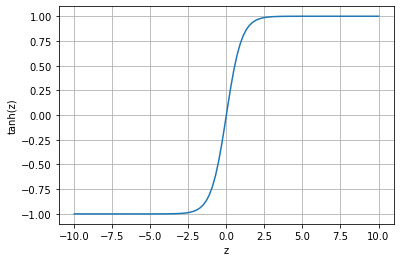

In [16]:
z = np.linspace(-10, 10, 100)
y = np.tanh(z)
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("tanh(z)")
plt.grid() 
plt.show()

รูปที่ 2.13 กราฟของฟังก์ชันไฮเพอร์โบลิกแทนเจนต์

ปัญหาประการหนึ่งของการใช้ฟังก์ชันซิกมอยด์หรือไฮเพอร์โบลิกแทนเจนต์คือเมื่อ $z$ มีค่ามาก ค่าอนุพันธ์จะมีค่าเข้าใกล้ศูนย์ 
ทำให้แต่ละขั้นของการปรับค่าพารามิเตอร์โดยขั้นตอนวิธีการลดค่าเกรเดียนต์มีค่าน้อย ผลคือโมเดลเรียนรู้ช้า ปัญหานี้รู้จักกันในชื่อ
การหายไปของเกรเดียนต์ (vanishing gradient)
ในการแก้ปัญหานี้ ฟังก์ชันกระตุ้นรูปแบบหนึ่งที่นิยมใช้ในชั้นแฝงของโมเดล DNN คือ ReLU ย่อมาจาก rectifier linear units มีนิยามดังนี้

$$
f(z) = max(0,z) \tag{2.34}
$$

สามารถพล็อตฟังก์ชัน ReLU ได้ดังรูปที่ 2.14

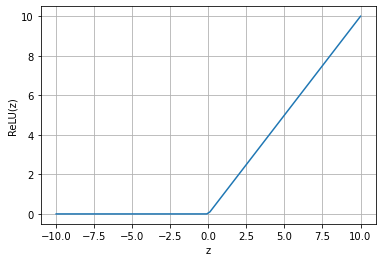

In [17]:
def ReLU(z):
    return z*(z>0)

z = np.linspace(-10, 10, 100)
y = ReLU(z)
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("ReLU(z)")
plt.grid() 
plt.show()


รูปที่ 2.14 กราฟของฟังก์ชัน ReLU

เหตุผลที่ ReLU ได้รับความนิยมเพราะความง่ายในการคำนวณสำหรับขั้นตอนการแพร่กระจายย้อนหลัง และมีความต้านทานต่อปัญหาการหายไปของเกรเดียนต์ 
ถึงแม้ว่าในเชิงวิเคราะห์ทางทฤษฎี ฟังก์ชัน ReLU มีจุดที่ไม่ต่อเนื่องที่ $z = 0$ 
ทำให้ไม่สามารถหาค่าอนุพันธ์ได้ที่จุดนั้น แต่ในทางปฏิบัติแล้วการที่ค่าของ $z$ จะเท่ากับศูนย์อย่างสมบูรณ์นั้นแทบเป็นไปไม่ได้เลย ตัวอย่างเช่นค่าที่ใกล้เคียงศูนย์ 
เช่น $10^{-16},\; -10^{-14}$สามารถหาอนุพันธ์ได้เท่ากับ 1 และ 0 ตามลำดับ

สังเกตว่าอนุพันธ์ของ ReLU สำหรับค่า $z$ ที่เป็นลบจะมีค่าเท่ากับศูนย์ เวอร์ชันหนึ่งของ ReLU ที่ไม่ต้องการค่าอนุพันธ์ที่เป็นศูนย์เรียกว่า Leaky ReLU 
มีนิยามคือ

$$
f(z) = max(\alpha z,z) \tag{2.35}
$$

โดย $\alpha$ มีค่าน้อย ตัวอย่างกราฟของ Leaky ReLU เมื่อ $\alpha = 0.01$  แสดงดังในรูปที่ 2.15

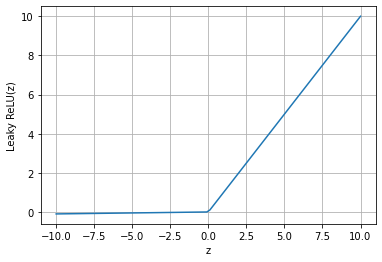

In [18]:
def LeakyReLU(z):
    return np.where(z>0, z, z*0.01)
z = np.linspace(-10, 10, 100)
y = LeakyReLU(z)
plt.plot(z,y)
plt.xlabel("z")
plt.ylabel("Leaky ReLU(z)")
plt.grid() 
plt.show()


รูปที่ 2.15 กราฟของฟังก์ชัน Leaky ReLU

#### 2.3.4 อนุพันธ์ของฟังก์ชันกระตุ้น

ในแผนภาพการแพร่กระจายย้อนหลังจะต้องมีการคำนวณอนุพันธ์ของฟังก์ชันกระตุ้น ดังนั้นในหัวข้อย่อยนี้จะเป็นการศึกษาอนุพันธ์ของฟังก์ชันกระตุ้นทั้ง 4 
ประเภทที่กล่าวถึงก่อนหน้านี้ โดยจะใช้สัญลักษณ์ $g'(z)$ แทน $\frac{dg(z)}{dz}$

เริ่มจากฟังก์ชันซิกมอยด์ $\sigma()$ (2.4) สามารถแสดงโดยแคลคูลัสได้อนุพันธ์ดังนี้

$$
g'(z) = \frac{1}{1+e^{-z}}\bigg(1 - \frac{1}{1+e^{-z}}\bigg) = g(z)(1-g(z)) = a(1-a) \tag{2.36}
$$

โดยด้านขวาสุดของ (2.36) มาจากการใช้สัญกรณ์ $a = g(z)$ 

กรณีฟังก์ชัน $tanh()$ (2.33) ได้อนุพันธ์เท่ากับ

$$
g'(z) = 1 - (tanh(z))^2 = 1 - g^2(z) = 1 - a^2 \tag{2.37}
$$

สำหรับฟังก์ชัน ReLU (2.34)

$$
g'(z) = \left\{ \begin{matrix}
0 & \textrm{if} & z<0 \\
1 & \textrm{if} & z>0 
\end{matrix} \right. \tag{2.38}
$$

และสำหรับ Leaky ReLU (2.35)

$$
g'(z) = \left\{ \begin{matrix}
\alpha & \textrm{if} & z<0 \\
1 & \textrm{if} & z>0 
\end{matrix} \right. \tag{2.39}
$$

โดยทางทฤษฎีคณิตศาสตร์ อนุพันธ์จะไม่นิยามถ้า $z=0$ ใน (2.38), (2.39) 
แต่เราได้ละทิ้งกรณีดังกล่าวเนื่องจาก $z=0$ โดยสมบูรณ์จะไม่เกิดขึ้นในทางปฏิบัติ

#### 2.3.5 การลดค่าเกรเดียนต์สำหรับ DNN ชั้นแฝงเดี่ยว

ก่อนจะอธิบายแผนภาพการคำนวณในส่วนการแพร่กระจายย้อนกลับเพื่อลดค่าเกรเดียนต์สำหรับ DNN ชั้นแฝงเดี่ยว จะสรุปสัญกรณ์ที่ใช้อีกครั้งหนึ่ง 
จากเดิมที่เราใช้ $n_x$ แทนจำนวนของอินพุต หลังจากได้ใช้วงเล็บสี่เหลี่ยมยกกำลังในการระบุหมายเลขชั้น จะยังคงใช้อักขระ $n$ 
แทนจำนวนของอินพุต เซลล์ในชั้นแฝง และเอาต์พุต ซึ่งแทนด้วย $n^{[0]},\;n^{[1]},\;n^{[2]}$ ตามลำดับ 

พารามิเตอร์ของ DNN คือค่าน้ำหนักและค่าเอนเอียงในรูปเมทริกซ์/เวกเตอร์  $W^{[1]},\;b^{[1]},\;W^{[2]},\;b^{[2]}$ 
มีขนาด $n^{[1]} \times n^{[0]},\; n^{[1]} \times 1,\;n^{[2]} \times n^{[1]},\; n^{[2]} \times 1$ 
ตามลำดับ จากปัญหาการจำแนกทวิภาคที่กำลังกล่าวถึงอยู่ขณะนี้จะได้ว่า $n^{[0]} = n_x$ และ $n^{[2]}=1$

ฟังก์ชันมูลค่าเขียนบรรยายได้เป็น

$$
J(W^{[1]},b^{[1]},W^{[2]},b^{[2]}) = \frac{1}{m}\sum_{i=1}^m\mathcal{L}(\hat{y},y) \tag{2.40}
$$

เริ่มต้นขั้นตอนวิธีโดยกำหนดค่าเริ่มต้นของค่าน้ำหนักและค่าเอนเอียงแบบสุ่ม (ห้ามกำหนดเป็นศูนย์เพราะความสมมาตรจะทำให้โมเดลไม่เรียนรู้) 
ใน 1 รอบของการฝึกประกอบด้วยการแพร่กระจายข้างหน้า

$$
\begin{split}
Z^{[1]} &= W^{[1]}X + b^{[1]} \\
A^{[1]} &= g^{[1]}(Z^{[1]}) \\
Z^{[2]} &= W^{[2]}A^{[1]} + b^{[2]} \\
A^{[2]} &= g^{[2]}(Z^{[2]}) = \sigma(Z^{[2]})
\end{split}
$$

เขียนเป็นคำสั่งไพธอนตามขั้นตอนวิธี 2.1 โดยตั้งชื่อตัวแปร <code>Zl, Wl, bl, Al, gl</code> 
แทน $Z^{[l]},\;W^{[l]},\;b^{[l]},\;A^{[l]},\;g^{[l]}$ ตามลำดับ โดยค่าของ <code>gl</code> 
คือเอาต์พุตของฟังก์ชันกระตุ้นของชั้น $l$ เช่น <code>g1 = ReLU(z1), g2 = sigmoid(Z2)</code>

```python
Z1 = W1@X + b1
A1 = g1
Z2 = W2@A1 + b2
A2 = g2
```

ขั้นตอนวิธี 2.1 การแพร่กระจายข้างหน้าสำหรับ DNN ชั้นแฝงเดี่ยว

และการแพร่กระจายย้อนหลัง เขียนเป็นคำสั่งไพธอนได้ตามขั้นตอนวิธี 2.2 โดยตั้งชื่อตัวแปร 
<code>dZl = </code>$\frac{\partial J}{\partial Z^{[l]}}$, <code>dWl = </code>$\frac{\partial J}{\partial W^{[l]}}$
<code>dbl = </code>$\frac{\partial J}{\partial b^{[l]}}$, <code>gprimel = </code>$g'^{[l]}(z^{[l]})$

```python
dZl = A2 - Y 
dW2 = (1/m)*dZ2@A1.T
db2 = (1/m)*np.sum(dZ2, axis=1, keepdims=True)
dZ1 = W2.T@dZ2*gprime1
dW1 = (1/m)*dZ1@X.T
db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
```

ขั้นตอนวิธี 2.2 การแพร่กระจายย้อนหลังสำหรับ DNN ชั้นแฝงเดี่ยว


รายละเอียดการคำนวณอนุพันธ์สำหรับการแพร่กระจายย้อนหลังทิ้งให้เป็นแบบฝึกหัดสำหรับผู้อ่าน

##### ตัวอย่าง 2.3

ในตัวอย่างนี้จะแสดงการสร้าง DNN ชั้นแฝงเดี่ยวโดยเขียนโค้ดภาษาไพธอนเพื่อจำแนกข้อมูล 2 ชนิดที่เป็นจุดปะปนกันในระนาบ
2 มิติ โดยแสดงความแตกต่างอย่างเด่นชัดเมื่อเปรียบเทียบกับการใช้โมเดลการถดถอยเชิงเส้น 
สำหรับการกำเนิดข้อมููลจะใช้ไลบรารี sklearn ซึ่งได้นำเข้าในโค้ดเซลล์แรกของบทนี้ ไลบรารีนี้มีข้อมูลให้ทดลองหลายชนิด 
ในตัวอย่างนี้เลือก Gaussian quantiles ลักษณะของจุดข้อมูล 400 ตัวอย่างเป็นดังรูปที่ 2.16 

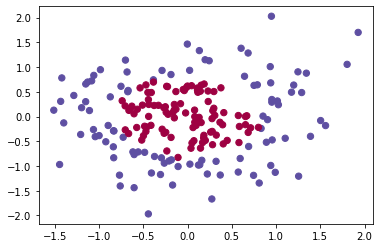

In [19]:
N = 200
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, 
            n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
X, Y = gaussian_quantiles
X, Y = X.T, Y.reshape(1, Y.shape[0])
# Visualize the data
plt.scatter(X[0, :], X[1, :], c=Y, s=40, cmap=plt.cm.Spectral);

รูปที่ 2.16 ข้อมูล Gaussian quantiles ที่ต้องการจำแนกประเภท

จากตำแหน่งของข้อมูลจะเห็นว่าจุดสีแดงรวมตัวอยู่ส่วนกลาง ส่วนสีน้ำเงินกระจายอยู่โดยรอบ โดย $X$ คือพิกัดของจุดข้อมูลใน 
2 มิติ และ $Y$ คือเลเบลทวิภาคที่แทนด้วยสี (0 = แดง, 1 = น้ำเงิน)

ในขั้นแรกจะทดลองจำแนกประเภทโดยใช้โมเดลการถดถอยลอจิสติก ซึ่งสามารถสร้างได้โดยฟังก์ชันจากไลบรารี sklearn 
ใช้โค้ดดังนี้ในการสร้างและฝึกโมเดล

In [20]:
LR_model = sklearn.linear_model.LogisticRegressionCV();
LR_model.fit(X.T, Y.T.reshape(-1));

ใช้ฟังก์ชันสนับสนุน plot_decision_boundary() เพื่อแสดงเส้นแบ่งเขตการจำแนกโดยโมเดลการถดถอยลอจิสติก 
ได้ผลดังแสดงในรูปที่ 2.17

In [21]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)


Accuracy of logistic regression: 50.5 %


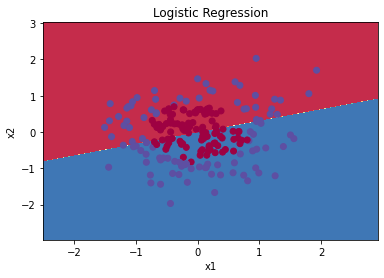

In [22]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: LR_model.predict(x), X, Y)
plt.title("Logistic Regression")

# Print accuracy
LRresults = LR_model.predict(X.T)

print ('Accuracy of logistic regression: ' + str(float(Y@LRresults.T + (1-Y)@(1-LRresults.T))/float(Y.size)*100) + ' %')


รูปที่ 2.17 เส้นแบ่งเขตการจำแนกข้อมูลจากโมเดลการถดถอยลอจิสติก

จากรูปที่ 2.17 จะเห็นว่าการถดถอยลอจิสติกพื้นฐานไม่สามารถแก้ปัญหานี้ได้อย่างมีประสิทธิภาพ ทั้งนี้เนื่องจากข้อมูลมีลักษณะที่ไม่เป็นเชิงเส้น 
จะทดลองใช้ DNN ที่มีเซลล์ประสาท 4 หน่วยคล้ายดังในรูปที่ 2.11 เพียงแต่ในโจทย์นี้จำนวนอินพุตเท่ากับ 2 
เลือกฟังก์ชันกระตุ้นที่เอาต์พุตชั้นแฝงเป็นแบบ tanh() และที่เอาต์พุตขั้นสุดท้ายเป็น $\sigma()$ 

หาค่าจำนวนของอินพุตและเอาต์พุตจากข้อมูล และกำหนดจำนวนเซลล์ของชั้นแฝง ตั้งชื่อตัวแปรเป็น 
<code>n_x, n_y, n_h</code>ตามลำดับ

In [23]:
n_x = X.shape[0] # input layer size
n_h = 4 # neurons in hidden layer
n_y = Y.shape[0] # output layer size
print("n_x = {}, n_h = {}, n_y = {}".format(n_x,n_h,n_y))

n_x = 2, n_h = 4, n_y = 1


ตั้งค่าเริ่มต้นให้กับพารามิเตอร์โมเดล โดยค่าน้ำหนักจะตั้งค่าแบบสุ่มและลดค่าโดยคูณด้วยค่าน้อยเช่น 0.01
ส่วนค่าเอนเอียงสามารถตั้งเป็นศูนย์ได้ (หากตั้งค่าน้ำหนักเริ่มต้นเป็นศูนย์ จะเกิดปัญหาจากความสมมาตรของโครงข่าย) 
เขียนเป็นฟังก์ชัน ```init_params()``` ที่คืนค่าเป็นดิกชันนารีของพารามิเตอร์ดังนี้

In [24]:
def init_params(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x) * 0.01 
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y, 1))
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    return parameters    

In [25]:
params = init_params(n_x, n_h, n_y)

สำหรับฟังก์ชันกระตุ้นที่ใช้ในชั้นแฝงได้จากไลบรารี ```np.tanh()``` เหลือเพียงเขียนฟังก์ชันกระตุ้น 
```sigmoid()``` เพื่อใช้ในเอาต์พุตขั้นสุดท้ายของโมเดล  

In [26]:
def sigmoid(z):
    y = 1/(1+np.exp(-z))
    return y

มาถึงขั้นนี้เราพร้อมที่จะเขียนโค้ดสำหรับแผนภาพการคำนวณในแต่ละรอบการฝึก 
เริ่มจากเขียนฟังก์ชัน ```fw_prop()``` สำหรับคำนวณการแพร่กระจายข้างหน้าโดยใช้เค้าโครงของโค้ดตามขั้นตอนวิธี 2.1 
โดยฟังก์ชันนี้รับอาร์กิวเมนต์เป็นข้อมูลอินพุต <code>X</code> และดิกชันนารีของพารามิเตอร์ <code>parameters</code>
เมื่อคำนวณการแพร่กระจายข้างหน้าแล้วจะคืนค่าเอาต์พุตของชั้นสุดท้าย <code>A2</code> และดิกชันนารี <code>cache</code> 
ที่ใช้ในการคำนวณการแพร่กระจายย้อนหลัง

In [27]:
def fw_prop(X, parameters):
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    ### END CODE HERE ###
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = W1@X + b1
    A1 = np.tanh(Z1)
    Z2 = W2@A1 + b2
    A2 = sigmoid(Z2)
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    return A2, cache

เมื่อได้เอาต์พุต <code>A2</code> ซึ่งเป็นการคำนวณแบบเวกเตอร์ที่รวมทุกตัวอย่างในการฝึก เราสามารถคำนวณฟังก์ชันมูลค่า (2.6) โดยเขียนเป็นฟังก์ชัน 
<code>compute_cost()</code>ดังนี้

In [28]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] # number of example
    logprobs = Y@np.log(A2).T + (1-Y)@np.log(1-A2).T
    cost = np.squeeze(np.float64(-logprobs /m))
    return cost
    

สำหรับขั้นตอนวิธีการแพร่กระจายย้อนหลัง ซึ่งเป็นส่วนที่มีความซับซ้อนเชิงคณิตศาสตร์ที่สุดสำหรับปัญหาการเรียนรู้เชิงลึก จะใช้เค้าโครงตามขั้นตอนวิธี 2.2 
เขียนเป็นฟังก์ชัน <code>bw_prop()</code> ได้ดังนี้

In [29]:
def bw_prop(parameters, cache, X, Y):
    m = X.shape[1]

    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    avg_m = 1/m 
    dZ2 = A2 - Y
    dW2 = avg_m*dZ2@A1.T
    db2 = avg_m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = (W2.T@dZ2) * (1 - np.power(A1, 2))
    dW1 = avg_m*dZ1@X.T
    db1 = avg_m*np.sum(dZ1, axis=1, keepdims=True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads    

โดยสังเกตว่า <code>bw_prop()</code> จะต้องการอาร์กิวเมนต์ <code>cache</code> ที่เป็นเอาต์พุตของ 
<code>fw_prop()</code> เมื่อคำนวณค่าการเปลี่ยนแปลงของพารามิเตอร์ในแต่ละขั้นได้แล้ว เขียนฟังก์ชัน <code>update_params()</code> 
เพื่อปรับค่าพารามิเตอร์ โดยมีอาร์กิวเมนต์สำหรับปรับค่าอัตราการเรียนรู้

In [30]:
def update_params(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}   
    return parameters

รวมฟังก์ชันย่อยทั้งหมดเพื่อสร้างโมเดล เขียนเป็นฟังก์ชัน <code>dnn1l_model()</code> 
ในตัวอย่างนี้เราจะให้จำนวนเซลล์ของชั้นแฝงเป็นอาร์กิวเมนต์เพื่อสามารถดูผลการจำแนกเมื่อแปรค่าจำนวนเซลล์ 

In [31]:
def dnn1l_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    n_x = X.shape[0] # input layer size
    n_y = Y.shape[0] # output layer size    

    parameters = init_params(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    for i in range(0, num_iterations):
        A2, cache = fw_prop(X, parameters) # forward propagation
        cost = compute_cost(A2, Y, parameters)
        grads = bw_prop(parameters, cache, X, Y) # backward propagation
        parameters = update_params(parameters, grads) # parameter update
 
        # Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

ฟังก์ชันสุดท้ายคือ <code>predict()</code>สำหรับการพยากรณ์เอาต์พุต ตามเงื่อนไขดังนี้

$$
\hat{y} = \left\{ \begin{matrix}
1 & a^{[2]}>0.5 \\
0 &  \textrm{otherwise} \end{matrix} \right.              
$$

In [32]:
def predict(parameters, X):
    A2, cache = fw_prop(X, parameters)
    predictions = (A2 > .5)
    return predictions

เมื่อเขียนฟังก์ชันย่อยครบทั้งหมดแล้ว เราพร้อมที่จะทดสอบโมเดลกับข้อมูล Gaussian quantiles ในรูปที่ 2.16 โดยเริ่มจากโมเดลที่มีจำนวนเซลล์ในชั้นแฝงเท่ากับ 4 
สร้างโมเดลและฝึกโดยข้อมูล <code>X,Y</code> โดยใช้ฟังก์ชัน <code>dnn1l_model()</code> ซึ่งจะุคืนค่าตัวแปร <code>parameters</code> 
เพื่อนำมาพยากรณ์ ทั้งหมดเขียนเป็นโค้ดได้ดังเซลล์ด้านล่าง ซึ่งจะพล็อตผลการจำแนกในรูปที่ 2.18

Cost after iteration 0: 0.693152
Cost after iteration 1000: 0.105743
Cost after iteration 2000: 0.078984
Cost after iteration 3000: 0.080186
Cost after iteration 4000: 0.069498
Cost after iteration 5000: 0.063616
Cost after iteration 6000: 0.077756
Cost after iteration 7000: 0.066885
Cost after iteration 8000: 0.060220
Cost after iteration 9000: 0.057332


[]

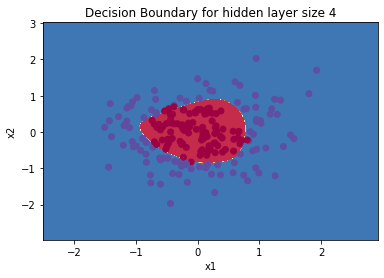

In [33]:
parameters = dnn1l_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(n_h))
plt.plot()

รูปที่ 2.18 ผลการจำแนกข้อมูลจากโมเดล DNN ชั้นแฝงเดี่ยว

เมื่อตรวจสอบค่าของฟังก์ชันมูลค่าที่ถูกพิมพ์ออกทุก 1000 รอบการฝึก จะเห็นว่าลดลงจากค่าเริ่มต้นจนกระทั่งเริ่มเข้าสู่ค่าน้อยและแกว่งอยู่ประมาณค่านั้น 
แสดงว่าขั้นตอนวิธีการลดค่าเกรเดียนต์ทำงานได้ตามที่คาดหวัง อย่างไรก็ตามการปรับค่าอัตราการเรียนรู้จะทำให้ได้ผลที่แตกต่างกัน 
หรืออาจทำให้ขั้นตอนวิธีไม่เสถียรก็ได้

เมื่อเปรียบเทียบผลการจำแนกข้อมูลจากการพยากรณ์โดยโมเดล DNN ชั้นแฝงเดี่ยวในรูปที่ 2.18 กับผลจากโมเดลการถดถอยลอจิสติกในรูปที่ 2.17 
จะแสดงได้ถึงข้อได้เปรียบในการเพิ่มชั้นแฝงให้กับโมเดล โดยจากข้อมูลจุดสีแดงจะกระจุกตัวอยู่บริเวณใจกลางของระนาบ ส่วนจุดสีฟ้าจะกระจายอยู่โดยรอบ 
การแบ่งขอบเขตจากโมเดล DNN สามารถจำแนกพื้นที่บนระนาบที่มีข้อมูลจุดสีแดงและสีฟ้าได้อย่างเหมาะสม 
ในขณะที่การจำแนกโดยโมเดลการถดถอยลอจิสติกจะได้ขอบเขตเป็นเส้นตรงที่ไม่สามารถจำแนกข้อมูลจากโจทย์นี้ได้อย่างมีประสิทธิภาพ

เมื่อคำนวณหาความแม่นยำในการจำแนกประเภทจะเห็นได้ว่ามีสัดส่วนในการพยากรณ์ถูกต้องดีกว่าโมเดลการถดถอยลอจิสติกอย่างเด่นชัด

In [34]:
results = predict(parameters, X)
print ('Accuracy: ' + str(float(Y@results.T + (1-Y)@(1-results.T))/float(Y.size)*100) + '%')

Accuracy: 97.5%


ในฟังก์ชัน <code>dnn1l_model()</code> สามารถป้อนค่าอาร์กิวเมนต์ <code>n_h</code> เป็นจำนวนเซลล์ในชั้นแฝง 
ทำให้เราสามารถศึกษาผลของจำนวนเซลล์ที่มีต่อการจำแนกข้อมูล โดยจะทดลองใส่ค่า <code>n_h = 1, 3, 5, 15</code>
โค้ดในเซลล์ด้านล่างนี้ใช้การวนรอบเพื่อฝึก 4 โมเดลนี้และพล็อตผลการจำแนกดังแสดงในรูปที่ 2.19

Accuracy for 1 hidden units: 68.5 %
Accuracy for 3 hidden units: 97.5 %
Accuracy for 5 hidden units: 97.5 %
Accuracy for 15 hidden units: 100.0 %


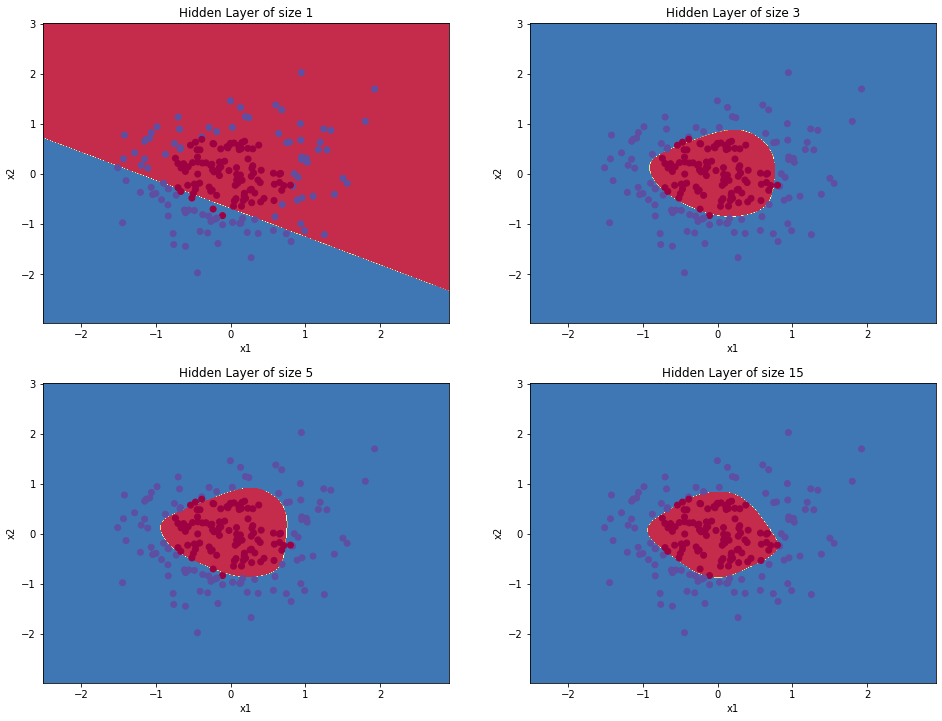

In [35]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1,3,5,15]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer of size %d' % n_h)
    parameters = dnn1l_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float(Y@predictions.T + (1-Y)@(1-predictions.T))/float(Y.size)*100
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

รูปที่ 2.19 ผลของจำนวนเซลล์ในชั้นแฝงที่มีต่อการจำแนกข้อมูล

จากผลที่ได้ในรูปที่ 2.19 และค่าความแม่นยำที่พิมพ์ออกเอาต์พุต จะเห็นว่าการเพิ่มจำนวนเซลล์ในชั้นแฝงสามารถช่วยปรับปรุงผลการจำแนกได้ 
ผู้อ่านสามารถเปลี่ยนค่าของ <code>n_h</code> ในโค้ดด้านบนเพื่อเลือกโมเดลที่ดีที่สุด ซึ่งในการรันแต่ละครั้งจะให้ผลที่แตกต่างกัน

#### 2.3.6 โมเดล DNN หลายชั้น

สัญกรณ์ที่ใช้สำหรับ DNN ชั้นแฝงเดี่ยวสามารถขยายไปยังโมเดล DNN ทั่วไปที่มีจำนวน $L$ ชั้นได้โดยง่าย รูปที่ 2.20 
แสดงตัวอย่าง DNN 4 ชั้น เมื่อนับเรียงจากชั้นแฝงแรก (จากซ้ายมาขวาไม่รวมชั้นอินพุต) มีจำนวนเซลล์เท่ากับ 4, 5, 3, 1 ตามลำดับ 

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1f1jWQGyBomwpSgZYtnmf43IJSfAK1j3w" width=600 />
</p>
<div align="center">รูปที่ 2.20 ตัวอย่างของ DNN 4 ชั้น </div>

**หมายเหตุ :** ในการนับชั้นของ DNN ดัชนีที่ใช้ในหนังสือนี้จะกำหนดอินพุตเป็นชั้น 0 และเอาต์พุตเป็น $L$ 

แผนภาพการคำนวณสำหรับหนึ่งตัวอย่างข้อมูลของ DNN ทั่วไปที่มีจำนวนชั้นเท่ากับ $L$ เขียนได้ดังในรูปที่ 2.21 
โดยประกอบด้วยการแพร่กระจายข้างหน้าและย้อนหลังของแต่ละชั้นต่ออนุกรมกันตามทิศทางการไหล 
ส่วนลูกศรที่ชี้ลงด้านล่างแสดงการส่งค่าของตัวแปรที่ได้จากการคำนวณด้านหน้าไปยังการคำนวณย้อนหลังในชั้นเดียวกันผ่านแคช 
(cache) คือตัวแปรที่มิใช่อินพุตและเอาต์พุตหลักของการไหล แต่ต้องการใช้ในการคำนวณเท่านั้น

<p />  
<p align="center">
<img src="https://drive.google.com/uc?id=1aA-Bueabo6US2z4FrX7a-nkHu87J--eK" width=800 />
</p>
<div align="center">รูปที่ 2.21 แผนภาพการคำนวณของ DNN $L$ ชั้นแฝง </div>

เมื่อเขียนเป็นการคำนวณเชิงเวกเตอร์ ข้อมูลอินพุตและเอาต์พุต จะอยู่ในรูปเมทริกซ์ 
<code>Al, Zl</code> สำหรับการไหลทางข้างหน้าจะเริ่มจากอินพุต $X$ที่นิยามเป็น $A^{[0]}$ 
เพื่อความสะดวกในการเขียนโค้ดวนรอบ ดังนั้นสำหรับชั้น $l$ ในทิศทางด้านหน้าจะคำนวณตามสมการดังนี้

$$
Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]} \tag{2.41}
$$
$$
A^{[l]} = g^{[l]}(Z^{[l]}) \tag{2.42}
$$

สามารถเขียนเป็นคำสั่งไพธอนตามขั้นตอนวิธี 2.3 โดยตั้งชื่อตัวแปร <code>Zl, Wl, bl, Al, gl</code> 
แทน $Z^{[l]},\;W^{[l]},\;b^{[l]},\;A^{[l]},\;g^{[l]}$ ตามลำดับ โดยค่าของ <code>gl</code> 
คือเอาต์พุตของฟังก์ชันกระตุ้นของชั้น $l$ เช่น <code>g1 = ReLU(z1), gL = sigmoid(ZL)</code>

<code>
Z1 = W1@A0 + b1
A1 = g1
Z2 = W2@A1 + b2
A2 = g2
:
Zl = Wl@Al_1 + Bl
Al = gl
:
ZL = WL@AL_1 + BL
AL = gL
</code>

ขั้นตอนวิธี 2.3 การแพร่กระจายข้างหน้าสำหรับ DNN ที่มีจำนวนชั้น L

**หมายเหตุ :** ใช้ชื่อตัวแปร <code>Al_1, Zl_1, AL_1, ZL_1</code> 
แทน $A^{[l-1]},\;Z^{[l-1]},\;A^{[L-1]},\;Z^{[L-1]}$ ตามลำดับ    

สำหรับการแพร่กระจายย้อนหลัง การคำนวณสำหรับชั้น $l$ จะเป็นตามสมการดังนี้

$$
dZ^{[l]} = dA^{[l]}*g'(z^{[l]}) \tag{2.43}
$$
$$
dW^{[l]} = \frac{\partial \mathcal{L}}{\partial W^{[l]}} = \frac{1}{m}dZ^{[l]}A^{[l-1]T} \tag{2.44}
$$
$$
db^{[l]} = \frac{\partial \mathcal{L}}{\partial b^{[l]}} = \frac{1}{m}\sum_{i=1}^mdZ^{[l](i)} \tag{2.45}
$$
$$
dA^{[l-1]} = \frac{\partial \mathcal{L}}{\partial A^{[l-1]}} = W^{[l]T}dZ^{[l]} \tag{2.46}
$$

เขียนเป็นคำสั่งไพธอนได้ตามขั้นตอนวิธี 2.4 โดยตั้งชื่อตัวแปร 
<code>dZl = </code>$\frac{\partial J}{\partial Z^{[l]}}$, <code>dWl = </code>$\frac{\partial J}{\partial W^{[l]}}$
<code>dbl = </code>$\frac{\partial J}{\partial b^{[l]}}$, <code>gprimel = </code>$g'^{[l]}(Z^{[l]})$

```python
dZL = dAL*gprimeL
dWL = (1/m)*dZL@AL_1.T
dbL = (1/m)*np.sum(dZL, axis=1, keepdims=True)
dAL_1 = WL.T@dZL
:
dZl = dAl*gprimel 
dWl = (1/m)*dZl@Al_1.T
dbl = (1/m)*np.sum(dZl, axis=1, keepdims=True)
dAl_1 = Wl.T@dZl
:
dZ1 = dA1*gprime1
dW1 = (1/m)*dZ1@A0.T
db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)
```

ขั้นตอนวิธี 2.4 การแพร่กระจายย้อนหลังสำหรับ DNN ที่มีจำนวนชั้น L

การแพร่กระจายย้อนหลังเริ่มจากชั้นของ DNN จากชั้นสุดท้าย $L$ ไปยังชั้นแรก (จากขวามาซ้าย) 
โดยแต่ละชั้นคำนวณค่าของ <code>dZl</code>ภายใน ใช้ค่าของ <code>Wl, Bl</code>จากแคช 
และได้เอาต์พุตคือ <code>dWl, dbl, dAl_1</code> 
ค่าของ <code>dWl, dbl</code> ที่คำนวณได้จะถูกนำไปปรับค่าของพารามิเตอร์ $Wl, Bl$ โดยขั้นการปรับกำหนดจากอัตราการเรียนรู้ 
<code>alpha</code>

```python
Wl := Wl - alpha*dWl
bl := bl - alpha*dbl
```

ส่วนค่าของ <code>dAl_1</code>ถูกส่งให้กับชั้นต่อไปทางด้านซ้าย จนกระทั่งถึงชั้นแรกค่าเอาต์พุต <code>dA0</code>
จะไม่ถูกใช้งาน

สังเกตว่าการแพร่กระจายย้อนหลังจะเริ่มต้นโดยค่า <code>dAL</code> ซึ่งจะไม่แสดงรายละเอียดทางคณิตศาสตร์ 
สามารถใช้แคลคูลัสในการแสดงว่า ในกรณีฟังก์ชันกระตุ้นซิกมอยด์ ค่าของ <code>daL</code> สำหรับข้อมูลตัวอย่าง $i$ เท่ากับ
$$
da^{[L](i)} = -\frac{y^{(i)}}{a^{(i)}} + \frac{1-y^{(i)}}{1-a^{(i)}} \tag{2.47}
$$

$$
dA^{[L]} = [da^{[L](1)},\;\ldots,\;da^{[L](m)}] = \left[-\frac{y^{(1)}}{a^{(1)}} + \frac{1-y^{(1)}}{1-a^{(1)}}\;,\; \ldots \;,\;  -\frac{y^{(m)}}{a^{(m)}} + \frac{1-y^{(m)}}{1-a^{(m)}}  \right] \tag{2.48}
$$

ซึ่งสามารถเขียนเป็นโค้ดไพธอนดังนี้

```python
dAL = - (np.divide(Y, AL) - np.divide(1-Y,1-AL))
```

สมมุติว่าต้องการสร้างโมเดลสำหรับ DNN 4 ชั้นในรูปที่ 2.20 เริ่มต้นจากการตั้งค่าเริ่มต้นโดยฟังก์ชัน 
<code>init_params_DNN()</code> ที่รับอาร์กิวเมนต์ <code>layer_dims</code> เป็นจำนวนเซลล์ในแต่ละชั้น 
ค่าสมาชิกของเมทริกซ์น้ำหนัก $W$ จะถูกตั้งเป็นค่าน้อยแบบสุ่มเพื่อมิให้เกิดปัญหาสมมาตร 
ส่วนสมาชิกค่าเวกเตอร์ $b$ สามารถกำหนดค่าเริ่มต้นเป็นศูนย์ ทั้งหมดถูกเก็บในดิกชันนารี <code>parameters</code> 
ที่จะถูกคืนค่าโดยฟังก์ชัน

In [74]:
def init_params_DNN(layer_dims):
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        # parameter initialization can affect performance significantly!
        # parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1])*0.01 # this doesn't work well!
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

**หมายเหตุ :** พบว่าการปรับมาตราส่วนค่าเริ่มต้นของเมทริกซ์น้ำหนักมีผลต่อสมรรถนะของ DNN เดิมใช้วิธีการคูณโดยค่าน้อยเช่น 0.01 
แต่เมื่อนำไปใช้งานจริงในตัวอย่าง 2.4 ด้านล่างพบว่าไม่ได้ผลเป็นที่พอใจ

ดังนั้นสำหรับโมเดล DNN 4 ชั้นในรูปที่ 2.20 ใช้คำสั่งตั้งค่าดังนี้ 

In [38]:
parameters = init_params_DNN([3,4,5,3,1])

โดยสมาชิกแรกของเวกเตอร์ในอาร์กิวเมนต์คือขนาดอินพุต 
ตรวจสอบขนาดของเมทริกซ์ค่าน้ำหนักและเวกเตอร์ค่าเอนเอียงว่าถูกต้องหรือไม่ เช่นเมทริกซ์ <code>W2</code> 
ต้องมีขนาดเท่ากับ $5 \times 4$ ตามจำนวนอินพุตและเอาต์พุตของชั้นแฝง 2

In [39]:
parameters["W2"]

array([[ 0.01310045,  0.00382854, -0.00426562, -0.00651953],
       [ 0.01479727, -0.00588439,  0.00462704,  0.00696917],
       [-0.00806387,  0.00335435, -0.01306411, -0.00684056],
       [-0.01692223,  0.01457309, -0.00171805, -0.00052134],
       [-0.00831425,  0.00893392, -0.00168758,  0.00753669]])

ก่อนจะสร้างแผนภาพการแพร่กระจายข้างหน้าและย้อนหลัง นิยามฟังก์ชันเสริมสำหรับฟังก์ชันกระตุ้นที่ใช้งานดังนี้

In [40]:
def sigmoid_fw(Z):
    A = 1/(1+np.exp(-Z))
    cache = Z
    return A, cache

def relu_fw(Z):
    A = np.maximum(0,Z)
    cache = Z
    return A, cache


def relu_bw(dA, cache):
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    return dZ

def sigmoid_bw(dA, cache):
    Z = cache    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

บางฟังก์ชันได้นิยามไว้ก่อนหน้านี้ 
สิ่งที่เพิ่มเข้ามาคือเอาต์พุตแดชที่ใช้ส่งผ่านตัวแปรจากการคำนวณด้านหน้าไปยังการแพร่กระจายย้อนกลับ

พิจารณาการไหลในทิศทางข้างหน้า จะสร้างฟังก์ชันสำหรับส่วนการคำนวณเอาต์พุตเชิงเส้น <code>linear_fw()</code>
และส่วนเชิงเส้นผ่านฟังก์ชันกระตุ้น <code>linear_activation_fw()</code> แยกจากกัน

In [41]:
def linear_fw(A, W, b):
    Z = W.dot(A) + b
    cache = (A, W, b)
    return Z, cache

In [42]:
def linear_activation_fw(A_prev, W, b, activation):
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_fw(A_prev, W, b)
        A, activation_cache = sigmoid_fw(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_fw(A_prev, W, b)
        A, activation_cache = relu_fw(Z)
    cache = (linear_cache, activation_cache)
    return A, cache

หลังจากเขียนฟังก์ชันย่อยแล้วจึงนำมาประกอบกันเป็นการแพร่กระจายข้างหน้าสำหรับโมเดล DNN ที่มีจำนวนชั้น L 
เขียนเป็นฟังก์ชัน <code>DNN_fw()</code>

In [43]:
def DNN_fw(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_fw(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_fw(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    return AL, caches

เมื่อได้เอาต์พุตจากชั้นสุดท้ายคือ $\hat{Y} = A^{[L]}$ แล้ว เขียนฟังก์ชัน <code>DNN_compute_cost()</code> 
เพื่อคำนวณมูลค่า (2.6)

In [44]:
def DNN_compute_cost(AL, Y):
    m = Y.shape[1]
    # Compute loss from aL and y.
    cost = (1./m) * (-Y@np.log(AL).T - (1-Y)@np.log(1-AL).T)
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect 
    return cost

เมื่อสร้างแผนภาพการคำนวณข้างหน้าจนถึงเอาต์พุตขั้นสุดท้ายที่ใช้คำนวณมูลค่าแล้ว ต่อมาคือฟังก์ชันสำหรับการกระจายย้อนหลัง 
เพื่อคำนวณเกรเดียนต์ของฟังก์ชันสูญเสียเทียบกับพารามิเตอร์ โดยจะแยกฟังก์ชันในลักษณะเดียวกับการคำนวณข้างหน้า 
คือ <code>linear_bw()</code> สำหรับส่วนเชิงเส้นและ <code>activation_bw()</code> สำหรับฟังก์ชันกระตุ้น

ในส่วนการคำนวณเชิงเส้นของชั้น $l$ เขียนฟังก์ชัน <code>linear_bw()</code> เพื่อคำนวณตามสมการ (2.44) - (2.46)

In [63]:
def linear_bw(dZ, cache):

    A_prev, W, b = cache
    m = A_prev.shape[1]
    avg_factor = 1./m
    dW = avg_factor*(dZ@A_prev.T)
    db = avg_factor*np.sum(dZ, axis=1, keepdims=True)
    dA_prev = W.T@dZ

    return dA_prev, dW, db

สำหรับการแพร่กระจายย้อนหลังจากส่วนเชิงเส้นผ่านฟังก์ชันกระตุ้น <code>linear_activation_bw()</code> 
ใช้สมการ (2.43) 
ร่วมกับฟังก์ชันกระตุ้น <code>relu_bw()</code> หรือ <code>sigmoid_bw()</code> 
และ <code>linear_bw()</code> ที่นิยามไว้ก่อนหน้านี้

In [46]:
def linear_activation_bw(dA, cache, activation):
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_bw(dA, activation_cache)
        dA_prev, dW, db = linear_bw(dZ, linear_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_bw(dA, activation_cache)
        dA_prev, dW, db = linear_bw(dZ, linear_cache)
    return dA_prev, dW, db

เมื่อเขียนฟังก์ชันย่อยทั้งหมดแล้ว สร้างส่วนแพร่กระจายย้อนหลังรวม <code>DNN_bw()</code> ดังนี้

In [47]:
def DNN_bw(AL, Y, caches):
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = -(Y/AL - (1-Y)/(1-AL))

    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    dAl, dWl, dbl = linear_activation_bw(dAL, current_cache, 'sigmoid')
    grads["dA" + str(L)] = dAl
    grads["dW" + str(L)] = dWl
    grads["db" + str(L)] = dbl
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 2)], caches". Outputs: "grads["dA" + str(l + 1)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        dAl, dWl, dbl = linear_activation_bw(dAl, current_cache, 'relu')
        grads["dA" + str(l + 1)] = dAl
        grads["dW" + str(l + 1)] = dWl
        grads["db" + str(l + 1)] = dbl
    return grads

ขั้นตอนสุดท้ายคือการปรับค่าพารามิเตอร์โดยขั้นตอนวิธีลดค่าเกรเดียนต์ เขียนฟังก์ชัน <code>update_params()</code> 
โดยมีอาร์กิวเมนต์สุดท้าย <code>learning_rate</code> สำหรับปรับค่าอัตราการเรียนรู้ 

In [48]:
def update_params(parameters, grads, learning_rate):
    L = len(parameters) // 2 # number of layers in the neural network
    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads['dW' + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads['db' + str(l+1)]
    return parameters

ในตัวอย่างต่อไปจะทดลองใช้ฟังก์ชันทั้งหมดนี้เพื่อสร้าง DNN สำหรับจำแนกภาพ

##### ตัวอย่าง 2.4

จากตัวอย่าง 2.2 เราได้ทดลองใช้โมเดลการถดถอยลอจิสติกในการจำแนกภาพว่ามีแมวอยู่หรือไม่
จากการฝึกพบว่าได้ค่าความแม่นยำประมาณ 70% ในตัวอย่างนี้จะทดลองใช้โมเดล DNN 
โดยคาดหวังว่าจะได้ความแม่นยำที่สูงขึ้น

นำเข้าไลบรารีเพิ่มเติมสำหรับตัวอย่างนี้ รวมถึงตั้งค่าโดยปริยายสำหรับพล็อตกราฟ

In [85]:
from PIL import Image
import scipy
from scipy import ndimage
import h5py
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


สำหรับชุดข้อมูล "Cat vs non-cat" ที่จะใช้ในตัวอย่างนี้สามารถดาวน์โหลดได้จาก 
https://www.kaggle.com/muhammeddalkran/catvnoncat โดยจะได้ 2 ไฟล์คือ train_catvnoncat.h5 
และ test_catvnoncat.h5 สำหรับการฝึกและทดสอบตามลำดับ 
ใส่ไฟล์ทั้งสองไว้ในไดเรคทอรีย่อย /datasets เราจะต้องใช้ไลบรารี h5py สำหรับโหลดข้อมูล 
ใช้ฟังก์ชัน <code>load_data()</code> ดังนี้

In [50]:
def load_data():
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_x = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_y = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_x = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_y = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_y = train_y.reshape((1, train_y.shape[0]))
    test_y = test_y.reshape((1, test_y.shape[0]))
    
    return train_x, train_y, test_x, test_y, classes


เพื่อนำข้อมูลของอินพุตและเลเบลในส่วนของการฝึกและทดสอบเข้าสู่แอเรย์ที่กำหนดชื่อให้สอดคล้องกัน

In [56]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

ผู้อ่านสามารถใช้คำสั่งแสดงภาพได้ ซึ่งจะเหมือนกับในตัวอย่าง 2.2 ที่เราได้แสดงบางภาพไปแล้ว (รูปที่ 2.5)
โดยประกอบด้วยข้อมูลภาพสำหรับการฝึกจำนวน 209 ภาพและภาพสำหรับทดสอบ 50 ภาพ 
คละกันระหว่างภาพที่มีแมวและไม่มีแมว และมีเลเบลกำกับ ข้อมูลของแต่ละภาพอยู่ในรูปเทนเซอร์ (64, 64, 3) 
แทนขนาดความกว้าง ยาว และสี (RGB) ซึ่งจะต้องปรับรูปให้เป็นเวกเตอร์อินพุตดังในรูปที่ 2.1 ทั้งส่วนของการฝึกและทดสอบ
และปรับมาตราส่วนให้อยู่ในช่วง 0 - 1 

In [57]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


ในตัวอย่างนี้จะทดลองสร้างโมเดล DNN 5 ชั้น ที่มีเซลล์ในชั้นแฝงเท่ากับ 30, 15, 5 
กำหนดโดยเวกเตอร์ดังนี้ (สมาชิกแรกและสุดท้ายคือเซลล์ชั้นอินพุตและเอาต์พุตตามลำดับ)

In [58]:
layers_dims = [12288, 30, 15, 5, 1]

เขียนฟังก์ชันสร้างโมเดล <code>DNN_model()</code> โดยใส่อาร์กิวเมนต์เป็นอินพุต เลเบล และไฮเปอร์พารามิเตอร์ที่ต้องการปรับ 
ภายในฟังก์ชันจะใช้ฟังก์ชันย่อยที่เขียนด้านบน และมีการพิมพ์และพล็อตค่าของมูลค่าในขณะที่ฝึกโมเดลเมื่อตั้งค่า 
<code>print_cost=True</code>

In [59]:
def DNN_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = init_params_DNN(layers_dims)
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = DNN_fw(X, parameters)
        
        # Compute cost.
        cost = DNN_compute_cost(AL, Y)
    
        # Backward propagation.
        grads = DNN_bw(AL, Y, caches)
 
        # Update parameters.
        parameters = update_params(parameters, grads, learning_rate)
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

ถึงขั้นนี้เราพร้อมที่จะฝึกโมเดลโดยฟังก์ชัน <code>DNN_model()</code> โดยคำสั่งดังนี้

Cost after iteration 0: 0.707687
Cost after iteration 100: 0.674204
Cost after iteration 200: 0.657472
Cost after iteration 300: 0.640426
Cost after iteration 400: 0.622337
Cost after iteration 500: 0.600142
Cost after iteration 600: 0.573188
Cost after iteration 700: 0.539337
Cost after iteration 800: 0.497823
Cost after iteration 900: 0.449736
Cost after iteration 1000: 0.384157
Cost after iteration 1100: 0.327019
Cost after iteration 1200: 0.435536
Cost after iteration 1300: 0.224067
Cost after iteration 1400: 0.171417
Cost after iteration 1500: 0.236891
Cost after iteration 1600: 0.051316
Cost after iteration 1700: 0.040455
Cost after iteration 1800: 0.034202
Cost after iteration 1900: 0.030084
Cost after iteration 2000: 0.027127
Cost after iteration 2100: 0.024701
Cost after iteration 2200: 0.022786
Cost after iteration 2300: 0.021144
Cost after iteration 2400: 0.019664


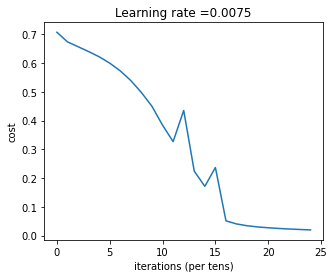

In [73]:
parameters = DNN_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

รูปที่ 2.22 ค่าของฟังก์ชันมูลค่าเทียบกับจำนวนรอบการฝึก

จากเอาต์พุตในรูปที่ 2.22 จะเห็นว่าค่าฟังก์ชันมูลค่ามีแนวโน้มลดลงตามจำนวนรอบการฝึก โดยลู่เข้าสู่ค่าประมาณ 0.02 

เขียนฟังก์ชัน <code>DNN_predict()</code> สำหรับพยากรณ์ 

In [61]:
def DNN_predict(X, y, parameters):
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = DNN_fw(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.5:
            p[0,i] = 1
        else:
            p[0,i] = 0
    
    #print results
    #print ("predictions: " + str(p))
    #print ("true labels: " + str(y))
    print("Accuracy: "  + str(np.sum((p == y)/m)))
        
    return p

In [75]:
pred_train = DNN_predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [77]:
pred_test = DNN_predict(test_x, test_y, parameters)

Accuracy: 0.78


เมื่อเปรียบเทียบความแม่นยำการพยากรณ์ภาพทดสอบกับโมเดลการถดถอยลอจิสติก (70%) จะเห็นว่าความแม่นยำสูงขึ้น 

ใช้ฟังก์ชัน <code>show_wrong_prediction()</code> เพื่อแสดงภาพที่โมเดลพยากรณ์ไม่ถูกต้อง

In [79]:
def show_wrong_prediction(classes, X, y, p):
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))


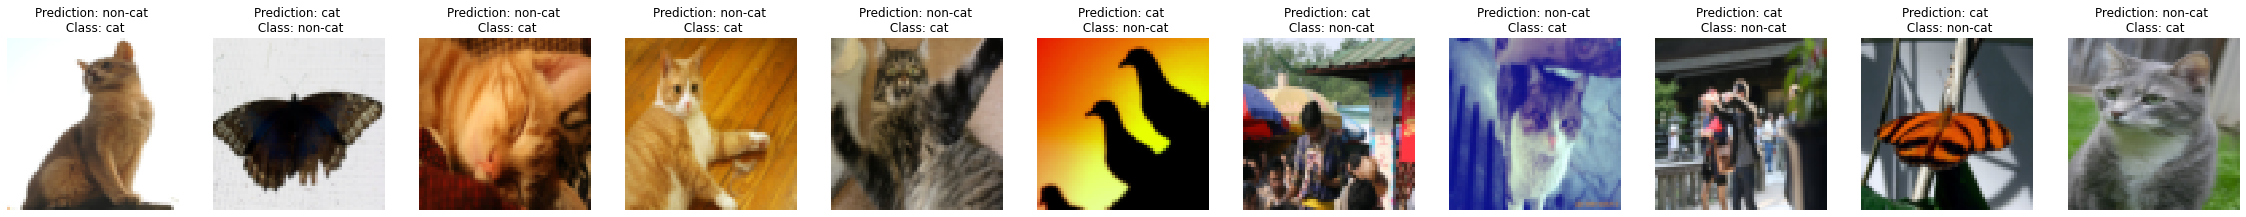

In [80]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

จะเห็นว่าภาพที่โมเดลพยากรณ์ผิดมักจะมีลักษณะเด่นที่สามารถสร้างความสับสนได้ เช่นสีของพื้นกับแมวมีความใกล้เคียงกัน อิริยาบทที่ผิดแปลกไป 
ความสว่างของภาพ หรือภาพที่มีรายละเอียดมาก 

เราสามารถทดลองใช้ภาพของตัวเองได้โดยใช้โค้ดในเซลล์ด้านล่างนี้ แก้ไขชื่อและไดเรคทอรีที่เก็บไฟล์และเลเบลให้สอดคล้องกับภาพ 
ผลจากการใช้ภาพของดอลล่าร์กับโมเดลนี้คือไม่สามารถพยากรณ์ได้ถูกต้องเหมือนเดิม

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


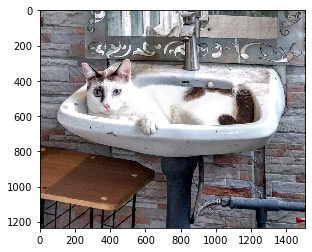

In [102]:
my_image = "images/dollar_sink.jpg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
num_px = train_x_orig.shape[1]
image = np.array(plt.imread(my_image))
my_image = Image.fromarray(image).resize(size=(num_px,num_px))
plt.imshow(image)
my_image_array = np.array(my_image).reshape((num_px*num_px*3,1))/255.
my_predicted_image = DNN_predict(my_image_array, my_label_y, parameters)

#plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

#### 2.3.7 สร้างโมเดลโดยไลบรารี TF

ในตัวอย่างที่ผ่านมาเราใช้ภาษาไพธอนเขียนโครงสร้างภายในของ DNN ทั้งในส่วนแพร่กระจายด้านหน้าและย้อนหลังเพื่อให้เข้าใจถึงแผนภาพการคำนวณอย่างชัดแจ้ง 
ในทางปฏิบัติเมื่อโมเดลมีความซับซ้อนมากขึ้นจะนิยมใช้ไลบรารีช่วยในการสร้างโมเดล ซึ่ง TF เป็นหนึ่งในไลบรารีที่มีคำสั่งสนับสนุนการสร้างโมเดลตั้งแต่ DNN 
ธรรมดาจนถึงโมเดลการเรียนรู้เชิงลึกประเภทอื่น ในหัวข้อนี้จะสาธิตการสร้างโมเดล DNN สำหรับจำแนกประเภท

##### ตัวอย่าง 2.5

ในตัวอย่างนี้เราจะศึกษาการจำแนกประเภทของภาพสุนัขและแมวจากข้อมูลที่ดาวน์โหลดได้จาก 

https://www.microsoft.com/en-us/download/details.aspx?id=54765 
    
นำไฟล์ไปไว้ใน /datasets และแตกไฟล์ออกเป็นไดเรคทอรีย่อย /kagglecatsanddogs_3367a/Petimages ซึ่งเป็นค่าโดยปริยายของไฟล์ 
kagglecatsanddogs_3367a.zip ที่ดาวน์โหลดมา หากผู้อ่านเปลี่ยนชื่อของไดเรคทอรีก็เพียงแก้โค้ดในตัวอย่างนี้ให้สอดคล้องกัน  
นำเข้าไลบรารีที่ใช้ในการจัดการไฟล์


In [2]:
import os
from shutil import copyfile

ตรวจสอบจำนวนภาพทั้งหมดของแมวและสุนัข

In [3]:
print(len(os.listdir('datasets/kagglecatsanddogs_3367a/Petimages/Cat/')))
print(len(os.listdir('datasets/kagglecatsanddogs_3367a/Petimages/Dog/')))

12501
12501


สร้างไดเรคทอรีย่อยเพื่อเก็บภาพสำหรับการฝึกและทดสอบดังนี้

In [4]:
try:
    os.mkdir('datasets/cats-v-dogs')
    os.mkdir('datasets/cats-v-dogs/training')
    os.mkdir('datasets/cats-v-dogs/testing')
    os.mkdir('datasets/cats-v-dogs/training/cats')
    os.mkdir('datasets/cats-v-dogs/training/dogs')
    os.mkdir('datasets/cats-v-dogs/testing/cats')
    os.mkdir('datasets/cats-v-dogs/testing/dogs')
except OSError:
    pass

เขียนฟังก์ชัน split_data() เพื่อแยกจำนวนภาพสำหรับฝึกและทดสอบตามอัตราส่วนที่กำหนดและใส่ไฟล์ลงในไดเรคทอรีย่อยที่สร้างไว้
นอกจากนั้นฟังก์ชันยังสามารถขจัดภาพที่ใช้งานไม่ได้ คือมีขนาดไฟล์เป็นศูนย์ 

In [5]:
import random
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[:testing_length]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)

เรียกฟังก์ชันโดยกำหนด 90% ของจำนวนไฟล์สำหรับการฝึกและ 10% สำหรับทดสอบ เอาต์พุตที่ได้จากการรันฟังก์ชัน split_data() 
คือไฟล์ที่ถูกขจัดออกเนื่องจากมีขนาดเป็นศูนย์ พบว่ามีจำนวนไฟล์เสียสำหรับภาพสุนัขและแมวอย่างละ 1 ไฟล์ 

In [6]:
CAT_SOURCE_DIR = "datasets/kagglecatsanddogs_3367a/Petimages/Cat/"
TRAINING_CATS_DIR = "datasets/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "datasets/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "datasets/kagglecatsanddogs_3367a/Petimages/Dog/"
TRAINING_DOGS_DIR = "datasets/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "datasets/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


ตรวจสอบจำนวนไฟล์สำหรับฝึกและทดสอบของภาพสุนัขและแมว

In [7]:
print('Number of training files (Cats) = ' + str(len(os.listdir('datasets/cats-v-dogs/training/cats/'))))
print('Number of training files (Dogs) = ' +str(len(os.listdir('datasets/cats-v-dogs/training/dogs/'))))
print('Number of testing files (Cats) = ' +str(len(os.listdir('datasets/cats-v-dogs/testing/cats/'))))
print('Number of testing files (Dogs) = ' +str(len(os.listdir('datasets/cats-v-dogs/testing/dogs/'))))

Number of training files (Cats) = 12371
Number of training files (Dogs) = 12367
Number of testing files (Cats) = 2379
Number of testing files (Dogs) = 2362


หากตรวจสอบข้อมูลภาพเหล่านี้ในไดเรคทอรีจะพบว่ามีขนาดความกว้างความยาวที่แตกต่างกัน  
ดังนั้นก่อนที่จะดำเนินการกับภาพหล่านี้จะต้องมีการประมวลผลเบื้องต้นเพื่อทำให้ข้อมูลมีความเหมาะสมกับการฝึก เช่นปรับมาตราส่วน ขนาดภาพ
ในกรณีที่ไฟล์ภาพถูกเก็บอยู่ในไดเรคทอรีดังเช่นในตัวอย่างนี้ เราสามารถใช้ฟังก์ชันเสริมคือ ImageDataGenerator() เข้าช่วย 
ซึ่งฟังก์ชันสามารถปรับแต่งภาพได้มากกว่านี้เช่นการหมุน ขยาย เฉือน ฯลฯ เรียกว่าการแต่งเติมภาพ (image augmentation)
แต่ในตัวอย่างนี้ต้องการเพียงลดค่าของแต่ละพิกเซลให้อยู่ในช่วง 0 - 1 และปรับขนาดภาพเป็น 150 x 150 

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
TRAINING_DIR = "datasets/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))
VALIDATION_DIR = "datasets/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))


Found 24736 images belonging to 2 classes.
Found 4741 images belonging to 2 classes.


การสร้างโมเดล DNN โดยไลบรารี TF เริ่มจากนำเข้าไลบรารีที่ต้องการใช้

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

ทดลองสร้างโมเดล 3 ชั้นแฝง มีจำนวนเซลล์แต่ละชั้นเท่ากับ 128, 64, 1 
ฟังก์ชันกระตุ้นของชั้นแฝงแบบ ReLU และของชั้นเอาต์พุตแบบซิกมอยด์ เขียนเป็นโค้ดได้ดังนี้ 

In [11]:
model = Sequential([
    Flatten(input_shape=(150, 150, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation = 'sigmoid')
])

โดยใช้ Sequential() ในการสร้างโมเดลและต้องใช้ชั้นแรกเป็น Flatten() 
ที่มีรูปแบบอินพุตตรงกับขนาดภาพที่สร้างโดย ImageDataGenerator() 

ใช้เมธอด model.compile() กำหนดตัวหาค่าเหมาะที่สุดแบบ SGD ฟังก์ชันสูญเสีย 'binary_crossentropy'
และใช้ความแม่นยำเป็นตัววัด

In [12]:
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy', metrics=['accuracy'])

ฝึกโมเดลจำนวน 15 รอบ โดยคืนค่าข้อมูลที่เป็นประวัติการฝึกในตัวแปรดิกชันนารี history (เซลล์นี้อาจใช้เวลานานในการรัน)

In [13]:
history = model.fit(train_generator, epochs=15,verbose=1,validation_data=validation_generator)

Epoch 1/15
150/248 [=================>............] - ETA: 24s - loss: 0.7140 - accuracy: 0.5460

C:\Users\ASUS\Anaconda3\envs\tensorflow\lib\site-packages\PIL\TiffImagePlugin.py:822: UserWarning: Truncated File Read
  warnings.warn(str(msg))


248/248 [==============================] - 76s 305ms/step - loss: 0.6971 - accuracy: 0.5603 - val_loss: 0.6725 - val_accuracy: 0.5815
Epoch 2/15
248/248 [==============================] - 78s 316ms/step - loss: 0.6620 - accuracy: 0.6022 - val_loss: 0.6544 - val_accuracy: 0.6157
Epoch 3/15
248/248 [==============================] - 81s 324ms/step - loss: 0.6545 - accuracy: 0.6108 - val_loss: 0.6525 - val_accuracy: 0.6184
Epoch 4/15
248/248 [==============================] - 73s 293ms/step - loss: 0.6472 - accuracy: 0.6184 - val_loss: 0.6455 - val_accuracy: 0.6248
Epoch 5/15
248/248 [==============================] - 79s 317ms/step - loss: 0.6397 - accuracy: 0.6280 - val_loss: 0.6446 - val_accuracy: 0.6260
Epoch 6/15
248/248 [==============================] - 80s 321ms/step - loss: 0.6352 - accuracy: 0.6375 - val_loss: 0.6425 - val_accuracy: 0.6288
Epoch 7/15
248/248 [==============================] - 77s 310ms/step - loss: 0.6301 - accuracy: 0.6412 - val_loss: 0.6274 - val_accuracy: 0.6

ห่ลังจากการฝึกเสร็จสิ้น เราสามารถเข้าถึงข้อมูลใน history เพื่อพล็อตค่าความแม่นยำและการสูญเสียเทียบกับจำนวนรอบการฝึก 
ดังแสดงในรููปที่ 2.23 และ 2.24 ตามลำดับ

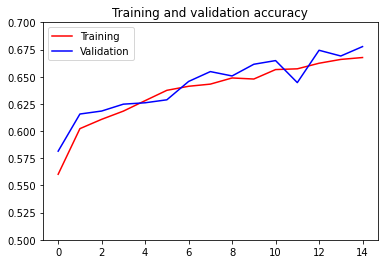

In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.ylim([0.5,0.7])
plt.legend(["Training","Validation"])
plt.show()


รูปที่ 2.23 ค่าความแม่นยำจากข้อมูลการฝึกและข้อมูลทดสอบเทียบกับจำนวนรอบ

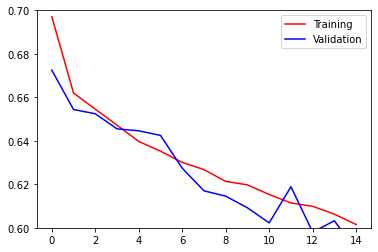

In [17]:
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.ylim([0.6,0.7])
plt.legend(["Training","Validation"])
plt.show()


รูปที่ 2.24 ค่าจากฟังก์ชันสูญเสียเทียบกับจำนวนรอบ

จากความแม่นยำที่ได้พบว่ามีค่าอยู่ประมาณไม่เกิน 70% ซึ่งเป็นผลที่ไม่น่าพอใจนักสำหรับการจำแนกภาพแมวและสุนัข 
ข้อด้อยของการใช้ DNN ในการจำแนกภาพคือไม่สามารถเรียนรู้ข้อมูลเชิงพื้นที่ (spatial information) 
ซึ่งเป็นองค์ประกอบภาพที่มีความสำคัญ เมื่อเราได้ศึกษาโมเดลแบบ CNN จะพบว่าสามารถจำแนกภาพด้วยความแม่นยำกว่า
DNN มาก


### 2.4 การจำแนกหลายประเภท

จากปัญหาการจำแนกทวิภาค เราสามารถขยายไปยังโมเดล DNN สำหรับการจำแนกหลายประเภท 
โครงสร้างของโมเดลไม่มีความแตกต่างจากเดิม 
ยกเว้นในชั้นสุดท้ายที่เอาต์พุตจะต้องมีจำนวนเท่ากับประเภทของข้อมูลที่ต้องการจำแนก 

#### 2.4.1 ฟังก์ชันกระตุ้นแบบซอฟต์แมกซ์

สังเกตว่าฟังก์ชันซิกมอยด์จะสามารถใช้จำแนกประเภทข้อมูลออกเป็น 2 กลุ่มตามค่าของความน่าจะเป็น 
หากต้องการจำแนกประเภทมากกว่า 2 กลุ่มจะใช้ฟังก์ชัน ซอฟต์แมกซ์ (softmax) 
ซึ่งเป็นการขยายฟังก์ชันลอจิสติกไปยังหลายมิติ นิยามมาตรฐานของฟังก์ชันซอฟต์แมกซ์ 
$\sigma : \mathbf{R}^K \rightarrow [0,1]^K$ เป็นดังนี้
$$
\sigma (Z)_i = \frac{e^{z_i}}{\sum_{j=1}^Ke^{z_j}}, \;i=1,\ldots,K, \; Z = (z_1,\ldots,z_K) \in \mathbf{R}^K \tag{2.49}
$$

อธิบายเป็นคำพูดได้ว่าเป็นการใช้ฟังก์ชันเลขชี้กำลังกับแต่ละสมาชิก $z_i$  ของเวกเตอร์ $Z$ 
และปรับค่าให้เป็นบรรทัดฐานโดยหารด้วยผลรวมของเลขชี้กำลังทั้งหมด 
ซึ่งมีผลทำให้ผลรวมของสมาชิกทั้งหมดในเวกเตอร์เอาต์พุตเท่ากับ 1 
ดังนั้นจึงเหมาะสมกับการจำแนกหลายกลุ่มโดยความน่าจะเป็นของเอาต์พุต

การสร้างโมเดลสำหรับปัญหาการจำแนกหลายประเภทโดยใช้ไลบรารี TF จะมีลักษณะเช่นเดียวกับตัวอย่าง 2.5 
สิ่งที่แตกต่างคือชั้นสุดท้ายจะมีเซลล์เอาต์พุตเท่ากับจำนวนของประเภททั้งหมดที่ต้องการจำแนก และใช้ฟังก์ชันกระตุ้นแบบซอฟต์แมกซ์

##### ตัวอย่าง 2.6 

ในไลบรารี TF มีข้อมูลสนับสนุนการศึกษาด้านการเรียนรู้เชิงลึกอยู่หลายชุดที่สามารถโหลดมาใช้งานได้ทันที ตัวอย่างหนึ่งคือการจำแนกเครื่องแต่งกาย 
10 ประเภท โดยชุดข้อมูลมีชื่อเรียกว่า fashion_mnist (https://github.com/zalandoresearch/fashion-mnist) 
จะใช้ข้อมูลนี้เพื่อสาธิตการสร้างโมเดล DNN สำหรับจำแนกเครื่องแต่งกาย 

นำเข้าไลบรารีทั้งหมดที่ใช้ในตัวอย่างนี้

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax
from tensorflow.keras.preprocessing import image

โหลดข้อมูล fashion_mnist จากไลบรารี ครั้งแรกจะใช้เวลาโหลดข้อมูลจากอินเทอร์เน็ตมาติดตั้งในเครื่องของเรา 
ในการรันเซลล์ครั้งต่อไปจะใช้ข้อมูลที่เก็บไว้ในเครื่อง

In [2]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

ตรวจสอบรูปของข้อมูลการฝึกจะเห็นว่าเป็นภาพที่มีความกว้างและยาก 28 พิกเซลจำนวน 60000 ภาพ ส่วนข้อมูลสำหรับทดสอบมีจำนวน 10000 ภาพ

In [3]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

นิยามเวกเตอร์ของเลเบลที่สอดคล้องกับข้อมูล

In [4]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

ปรับมาตราส่วนของภาพเพื่อให้แต่ละพิกเซลมีค่าระหว่าง 0 - 1 

In [6]:
train_images = train_images/255.
test_images = test_images/255.

เราสามารถดูภาพที่ใช้ในการฝึกได้โดยโค้ดดังนี้ (เปลี่ยนค่าตัวชี้ i ตามต้องการ)

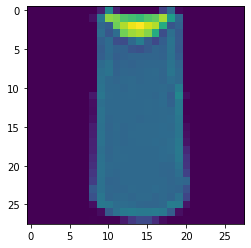

label: T-shirt/top


In [8]:
i = 2 # change to observe another image
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

สร้างโมเดล DNN 3 ชั้นแฝงที่มีจำนวนเซลล์ 16, 16, 10 มีรูปของอินพุตเท่ากับขนาดความกว้างและยาวของภาพ และฟังก์ชันกระตุ้นที่เอาต์พุตแบบซอฟต์แมกซ์

In [9]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(16, activation='relu'),
    Dense(16, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 16)                12560     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 13,002
Trainable params: 13,002
Non-trainable params: 0
_________________________________________________________________


สำหรับคำสั่งคอมไพล์ จุดที่แตกต่างคือฟังก์ชันสูญเสียเลือกเป็นแบบ 'sparse_categorical_crossentropy' 

In [11]:
model.compile(optimizer='sgd',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

ทดลองฝึกโมเดลเป็นจำนวน 10 รอบโดยเก็บข้อมูลการฝึกในดิกชันนารี history

In [13]:
history=model.fit(train_images[...,np.newaxis], train_labels, epochs=10, batch_size=256, verbose=2)

Epoch 1/10
235/235 - 0s - loss: 1.8176 - accuracy: 0.4008
Epoch 2/10
235/235 - 0s - loss: 1.1105 - accuracy: 0.6185
Epoch 3/10
235/235 - 0s - loss: 0.8920 - accuracy: 0.6827
Epoch 4/10
235/235 - 0s - loss: 0.7940 - accuracy: 0.7109
Epoch 5/10
235/235 - 0s - loss: 0.7311 - accuracy: 0.7340
Epoch 6/10
235/235 - 0s - loss: 0.6853 - accuracy: 0.7512
Epoch 7/10
235/235 - 0s - loss: 0.6506 - accuracy: 0.7654
Epoch 8/10
235/235 - 0s - loss: 0.6223 - accuracy: 0.7777
Epoch 9/10
235/235 - 0s - loss: 0.5986 - accuracy: 0.7878
Epoch 10/10
235/235 - 0s - loss: 0.5789 - accuracy: 0.7958


การพล็อตข้อมูลการฝึกในตัวอย่างนี้จะใช้ไลบรารี pandas โดยแปลงตัวแปร history เป็นเฟรมข้อมูล

In [14]:
df = pd.DataFrame(history.history)
df.head()

,loss,accuracy
0,1.817616,0.400850
1,1.110508,0.618517
2,0.892040,0.682733
3,0.794009,0.710917
4,0.731081,0.734000


พล็อตความแม่นยำและค่าสูญเสียเทียบกับรอบการฝึกได้ดังในรูปที่ 2.25 และ 2.26 ตามลำดับ

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'Epochs')]

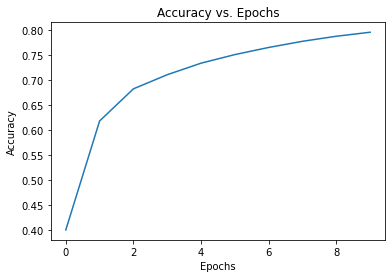

In [15]:
acc_plot = df.plot(y="accuracy",title="Accuracy vs. Epochs", legend=False)
acc_plot.set(xlabel="Epochs",ylabel="Accuracy")

รูปที่ 2.25 ค่าความแม่นยำเทียบกับจำนวนรอบ

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Epochs')]

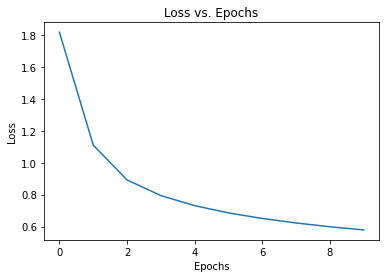

In [16]:
loss_plot = df.plot(y="loss",title="Loss vs. Epochs", legend=False)
loss_plot.set(xlabel="Epochs",ylabel="Loss")

รูปที่ 2.26 ค่าฟังก์ชันสูญเสียเทียบกับจำนวนรอบ

ประเมินความแม่นยำและค่าการสูญเสียโดยใช้ภาพสำหรับทดสอบ พบว่าค่าความแม่นยำน้อยกว่าที่ได้จากข้อมูลการฝึกเล็กน้อย

In [17]:
model.evaluate(test_images[..., np.newaxis],test_labels)

313/313 [==============================] - 0s 444us/step - loss: 0.5986 - accuracy: 0.7825


[0.5986158847808838, 0.7825000286102295]

ตรวจสอบว่าโมเดลสามารถพยากรณ์ได้ถูกต้องหรือไม่จากภาพที่สุ่มจากข้อมูลชุดทดสอบ

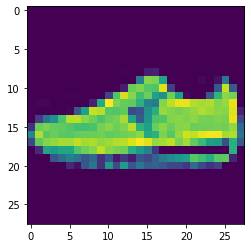

Label : Sneaker


In [30]:
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label : {labels[test_labels[random_inx]]}")

In [31]:
pred = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"Model prediction : {labels[np.argmax(pred)]}")

Model prediction : Sneaker


ทดลองรันสองเซลล์ด้านบนนี้หลายครั้งเพื่อเปลี่ยนภาพทดสอบ พิจารณาให้เหตุผลภาพที่โมเดลพยากรณ์ไม่ถูกต้อง

### 2.5 สรุปท้ายบท



เนื้อหาในบทนี้เป็นการศึกษาโครงข่ายประสาทเทียม โดยเริ่มจาก ANN ขั้นพื้นฐานที่มีเพียงชั้นอินพุตและเอาต์พุต โมเดลอย่างง่ายนี้สามารถใช้งานในปัญหาขั้นพื้นฐาน 
เช่นการพยากรณ์เชิงเส้น หรือการจำแนกประเภทที่ข้อมูลสามารถถูกแบ่งกลุ่มได้โดยเส้นตรง 
เมื่อโจทย์มีความซับซ้อนมากขึ้น โดยทั่วไปจะพบว่าการใช้ DNN ที่มีชั้นแฝงและฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นสามารถแก้ปัญหาได้ดีกว่า 

เราได้ศึกษาโครงสร้างภายในของ DNN ในรูปของแผนภาพการคำนวณด้านหน้าและย้อนหลัง โดยใช้โค้ดไพธอนในการอิมพลิเมนต์ฟังก์ชันต่างๆ 
ที่เกี่ยวข้อง อย่างไรก็ตามการเขียนโค้ดสำหรับโมเดลที่มีความซับซ้อนมากขึ้นเป็นแนวทางที่ไม่แนะนำเพราะอาจเกิดความผิดพลาดได้ง่าย 
ในปัจจุบันมีไลบรารีการเรียนรู้เชิงลึกเช่น TF ที่สนับสนุนการสร้างโมเดล 
โดยซ่อนการคำนวณทั้งหมดอยู่ในตัวไลบรารีทำให้ผู้ใช้ไม่ต้องกังวลกับการเขียนฟังก์ชัน ReLU ซิกมอยด์ หรือการลดค่าเกรเดียนต์ 
ดังนั้นเมื่อเราเข้าใจพื้นฐานทางคณิตศาสตร์ที่นำเสนอในบทนี้แล้ว ในส่วนต่อไปของหนังสือหลังจากกล่าวถึงคณิตศาสร์ที่อยู่ภายในแล้ว 
จะเรียกใช้ไลบรารี TF ที่มีอยู่ในการอิมพลิเมนต์ 

ในการใช้งานด้านการเรียนรู้เชิงลึกโดยทั่วไป เราคงไม่โชคดีขนาดออกแบบโมเดล DNN เพียงครั้งแรกแล้วใช้งานได้ดีเป็นที่น่าพอใจ 
การออกแบบจริงจะมีลักษณะเป็นวงรอบของการทดสอบและปรับแต่งตัวเลือก เช่นจำนวนชั้นแฝง จำนวนเซลล์ในแต่ละชั้น ชนิดของฟังก์ชันกระตุ้น 
รวมถึงตัวเลือกอื่นที่จะได้ศึกษาในบทต่อไป เรียกโดยรวมว่า ไฮเปอร์พารามิเตอร์ คือค่าที่สามารถปรับแต่งโดยผู้ใช้ 
แตกต่างจากพารามิเตอร์ของโมเดลที่ถูกปรับแต่งโดยขั้นตอนวิธีในการฝึก

นอกจากนั้นเรามักจะไม่พบโมเดล DNN ในรูปแบบพื้นฐานที่กล่าวถึงในบทนี้ แต่จะถูกแต่งเติมเพื่อให้มีประสิทธิภาพดีขึ้น 
เช่นการเพิ่มชั้นสังวัตนาการเป็นโมเดลแบบ CNN เพื่อเพิ่มความแม่นยำในการจำแนกภาพ หรือการใช้สถาปัตยกรรมในรูปแบบอื่นในโมเดล 
ซึ่งเนื้อหาเหล่านี้จะได้กล่าวถึงต่อไปในหนังสือนี้

### โจทย์ปัญหา

2-1 ทดลองฝึกโมเดลในตัวอย่าง 2.1 เป็นจำนวนรอบมากขึ้น ตรวจสอบความแม่นยำของโมเดลว่าเพิ่มขึ้นมากน้อยเพียงใด

2-2 ใช้ตัวอย่างโมเดลอย่างง่าย เช่นมี 2 อินพุต และชั้นแฝงเดี่ยวประกอบด้วย 2 เซลล์ เพื่อแสดงให้เห็นว่า หากชั้นแฝงไม่มีฟังก์ชันกระตุ้นแบบไม่เป็นเชิงเส้นแล้ว
เราสามารถยุบโมเดล DNN นั้นเหลือเป็นโมเดล ANN เชิงตื้นได้ 

2-3 แสดงรายละเอียดการคำนวณอนุพันธ์สำหรับการแพร่กระจายย้อนหลังของโมเดล DNN ชั้นแฝงเดี่ยว

2-4 ทดลองตัวอย่าง 2.3 กับข้อมูลอื่นจากไลบรารี sklearn เพื่อความสะดวกสามารถใช้ฟังก์ชัน 
<code>load_datasets()</code>นี้แทนในเซลล์แรกของตัวอย่าง 2.3 
```python
def load_extra_datasets():  
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
    blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5,
                    n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N, 2)
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure
```

2-5 ทดลองปรับค่าไฮเปอร์พารามิเตอร์ในตัวอย่าง 2.4 ท่านสามารถได้โมเดลที่มีความแม่นยำมากขึ้นหรือไม่ วิจารณ์ผล 

2-6 จากตัวอย่าง 2.5 เราสามารถทดสอบโดยใช้ภาพของตัวเอง โดยใส่ภาพลงในไดเรคทอรีย่อย 
test_images/ และใช้ชุดคำสั่งดังนี้ (ใส่ชื่อไฟล์ในตัวแปร fn)

```python
import numpy as np
from keras.preprocessing import image

fn = '' # your filename
# predicting images
path = 'test_images/' + fn
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
print(fn + " is a dog")
else:
print(fn + " is a cat")
```
ทดลองใช้ภาพสุนัขหรือแมวจากอินเทอร์เน็ตหรือภาพสัตว์เลี้ยงของท่านเอง โมเดลสามารถจำแนกได้ถูกต้องหรือไม่?


<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja 2022</div>